Survived номинативная шкала
Pclass порядковая шкала
Name номинативная шкала
Sex номинативная шкала
Age интервальная шкала
SibSp относительная шкала
Parch относительная шкала
Ticket номинативная шкала
Fare относительная шкала
Cabin номинативная шкала
Embarked номинативная шкала


Мода 0    0
Name: Survived, dtype: int64
Медиана 3.0
Мода 0    Connolly, Miss. Kate
1        Kelly, Mr. James
Name: Name, dtype: object
Мода 0    male
Name: Sex, dtype: object
Среднее значение 29.881137667304014
Среднее значение 0.4988540870893812
Среднее значение 0.3850267379679144
Мода 0    CA. 2343
Name: Ticket, dtype: object
Среднее значение 33.29547928134557
Мода 0    C23 C25 C27
Name: Cabin, dtype: object
Мода 0    S
Name: Embarked, dtype: object
Survived номинативная шкала
Pclass порядковая шкала
Name номинативная шкала
Sex номинативная шкала
Age номинативная шкала
SibSp номинативная шкала
Parch номинативная шкала
Ticket номинативная шкала
Fare номинативная шкала
Cabin номинативная шкала
Embarked номинат

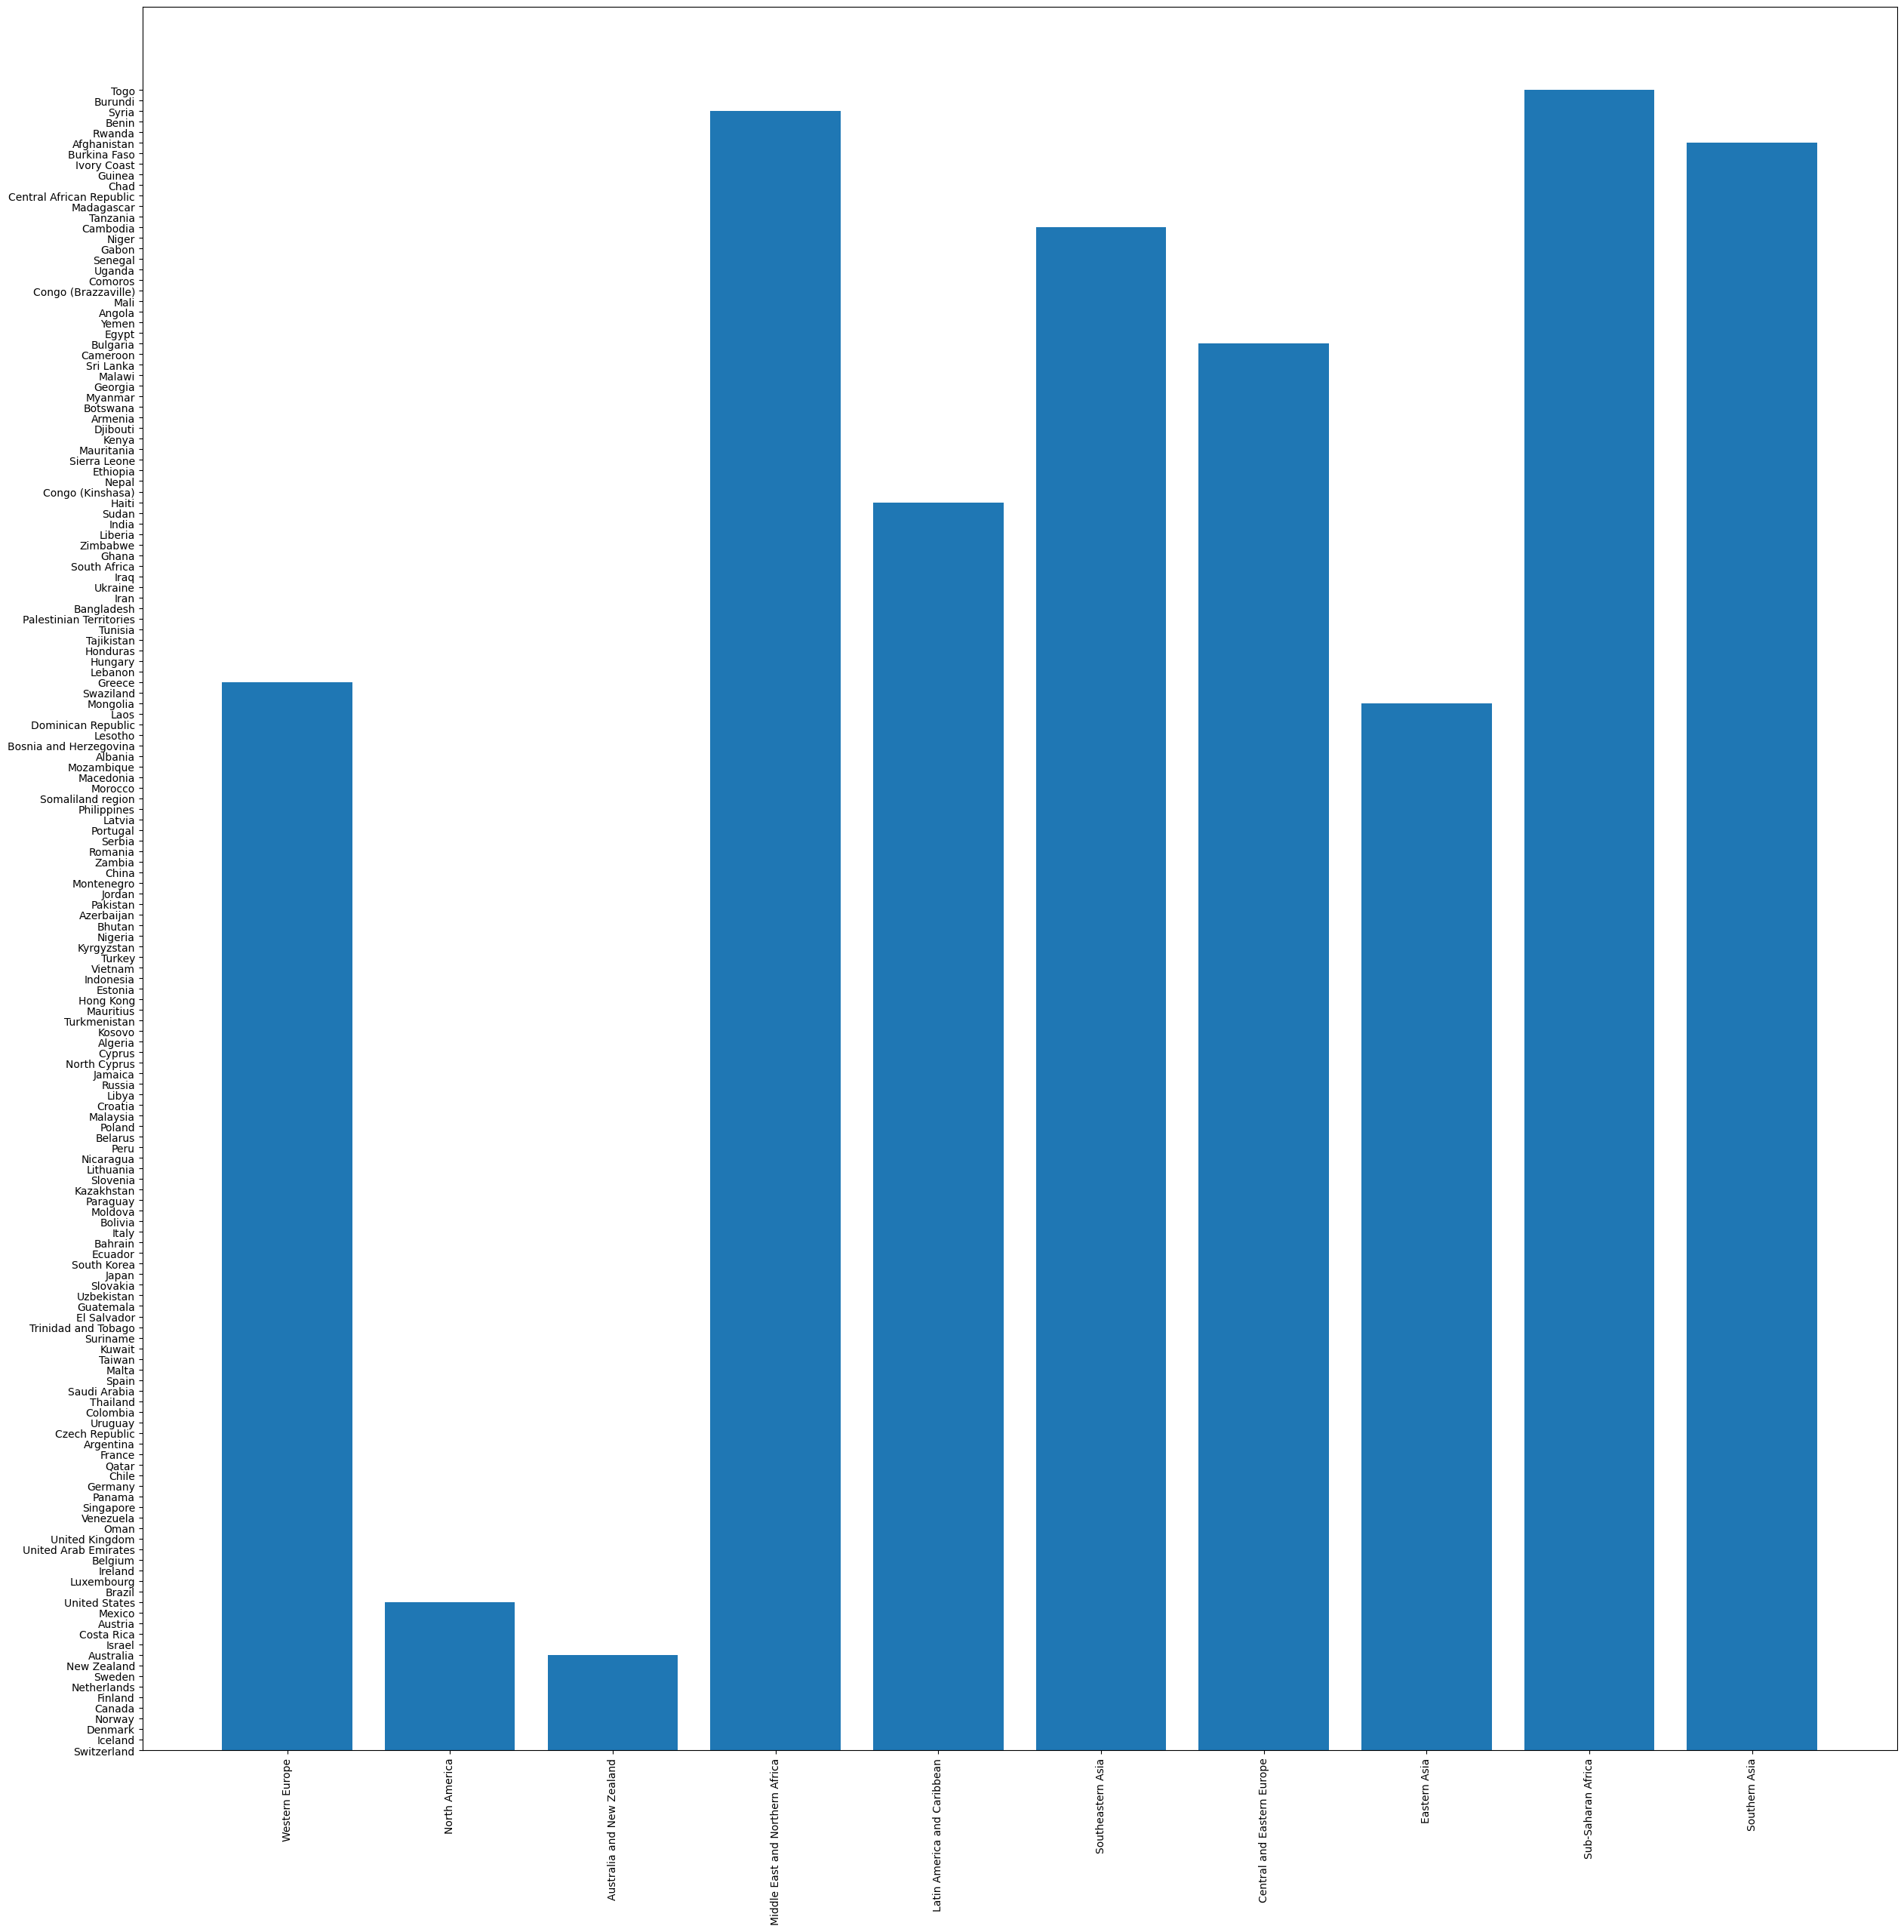

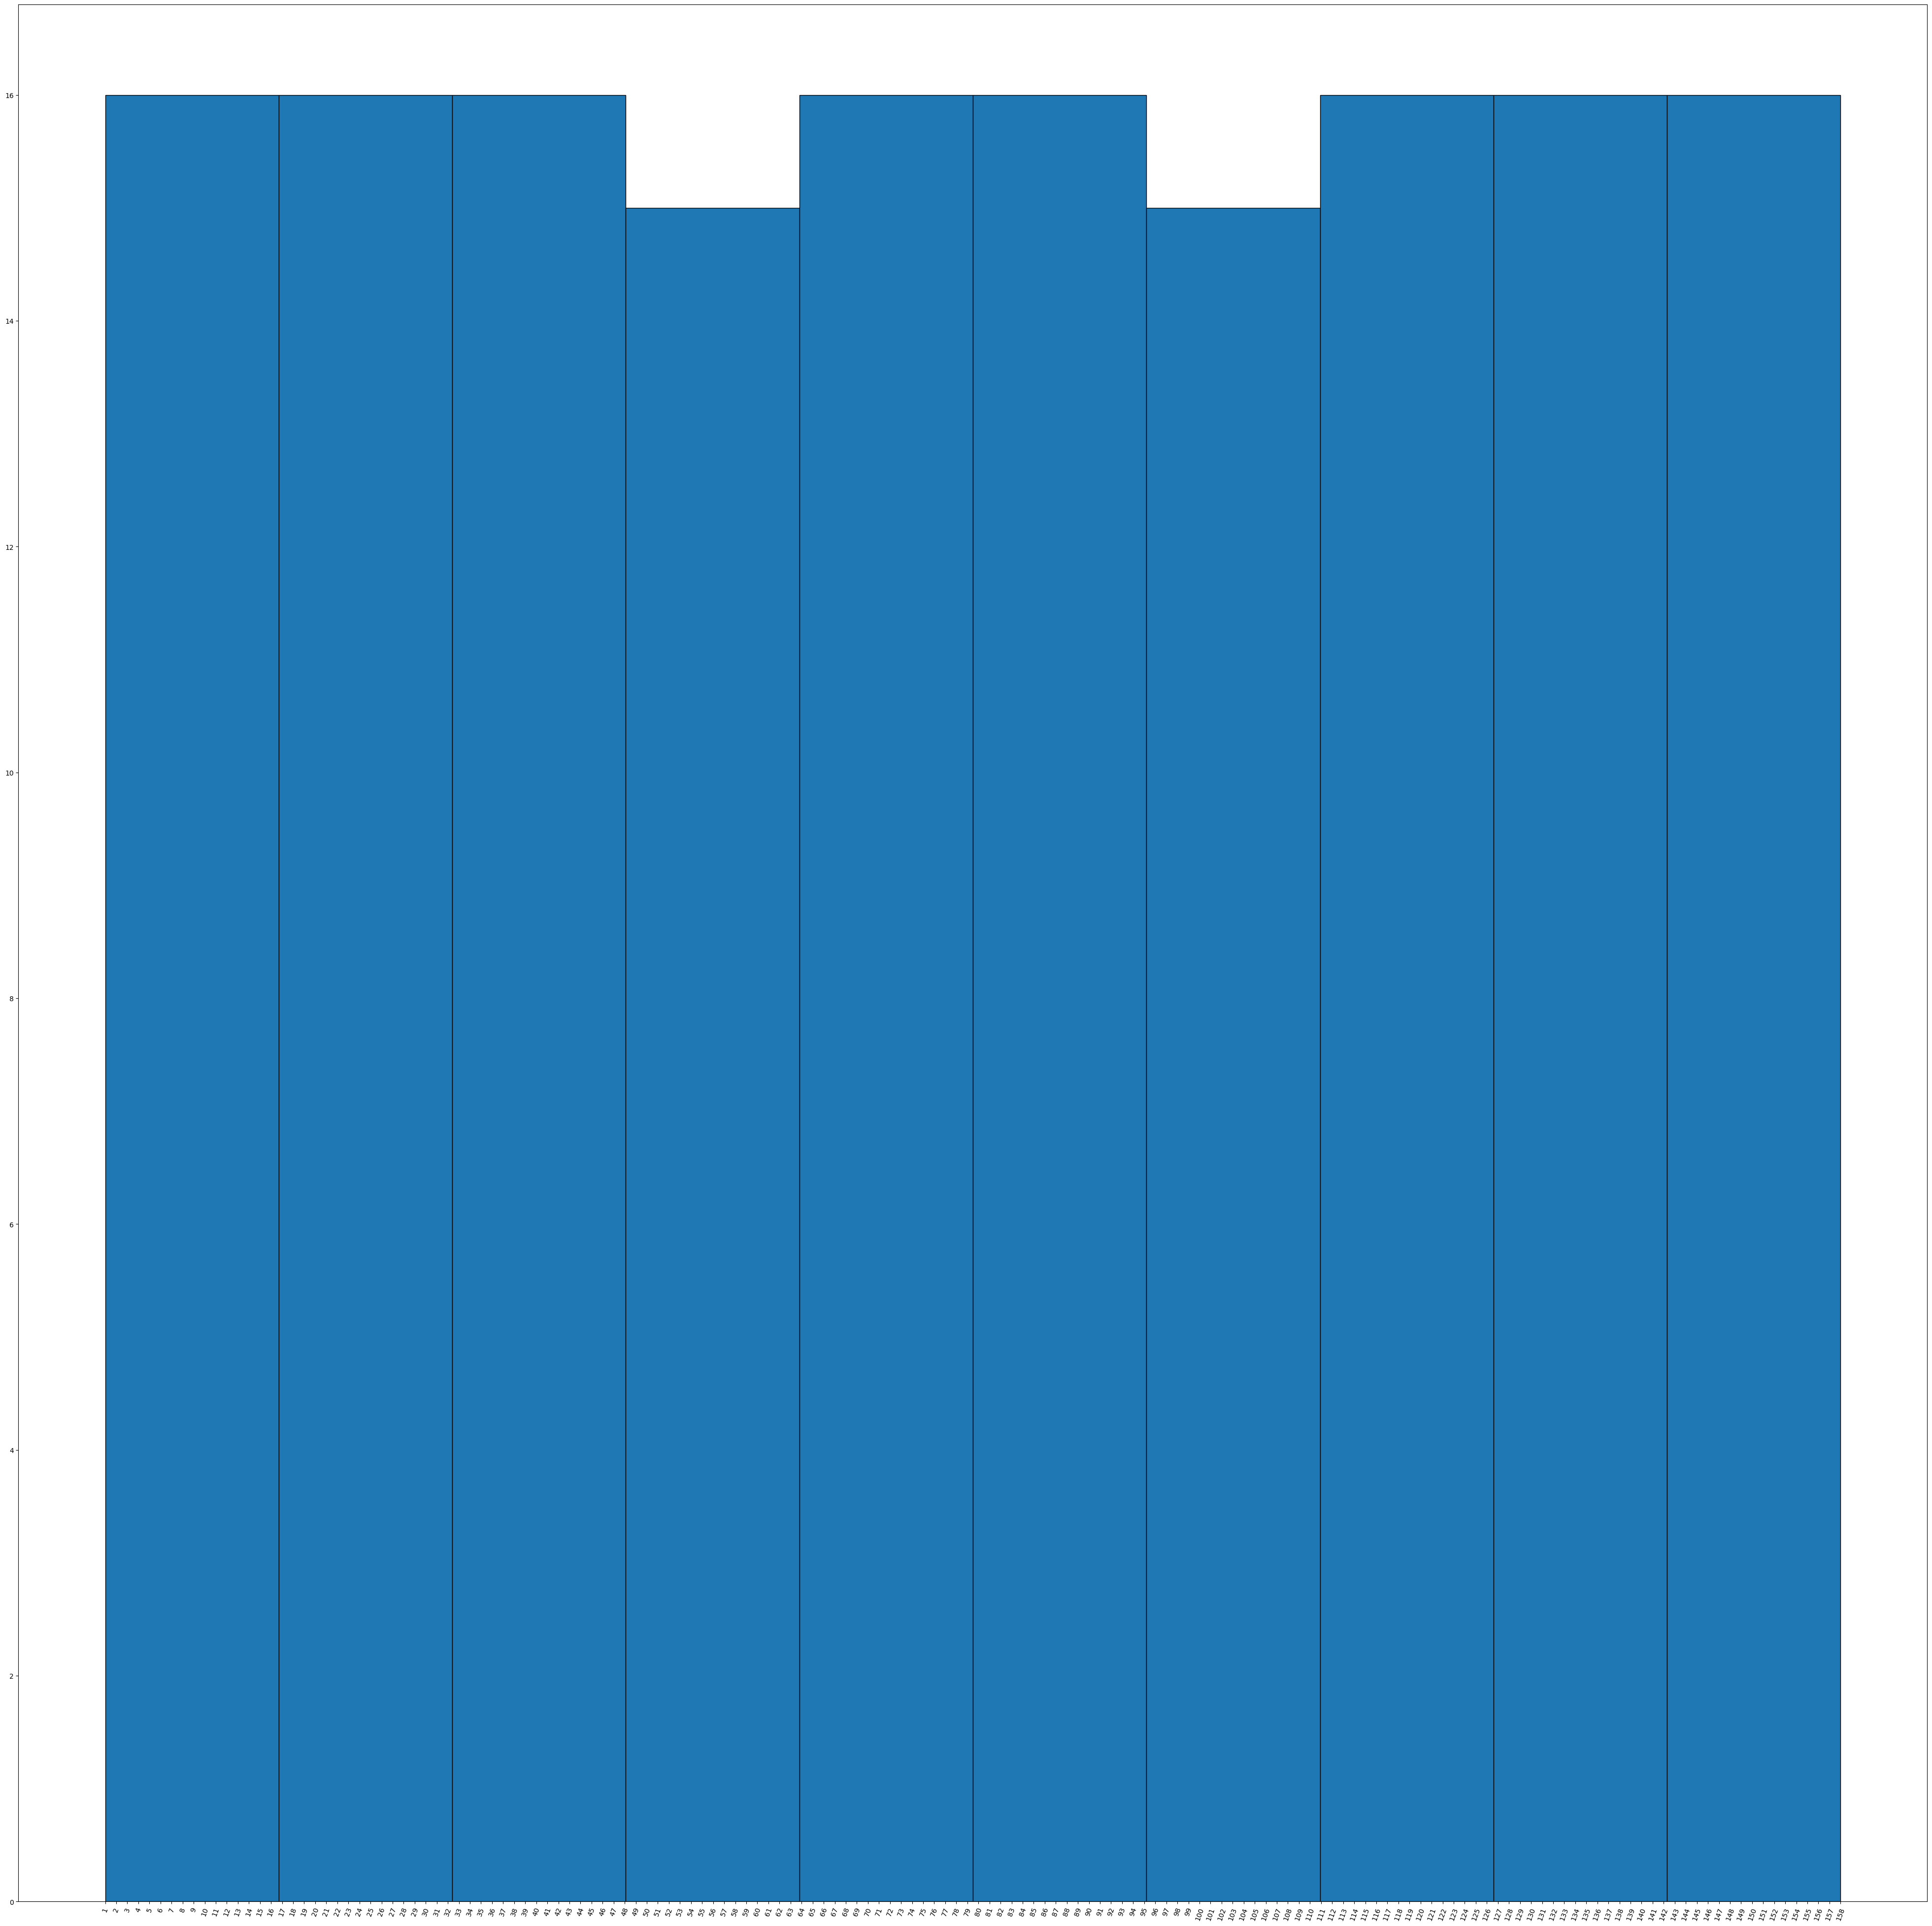

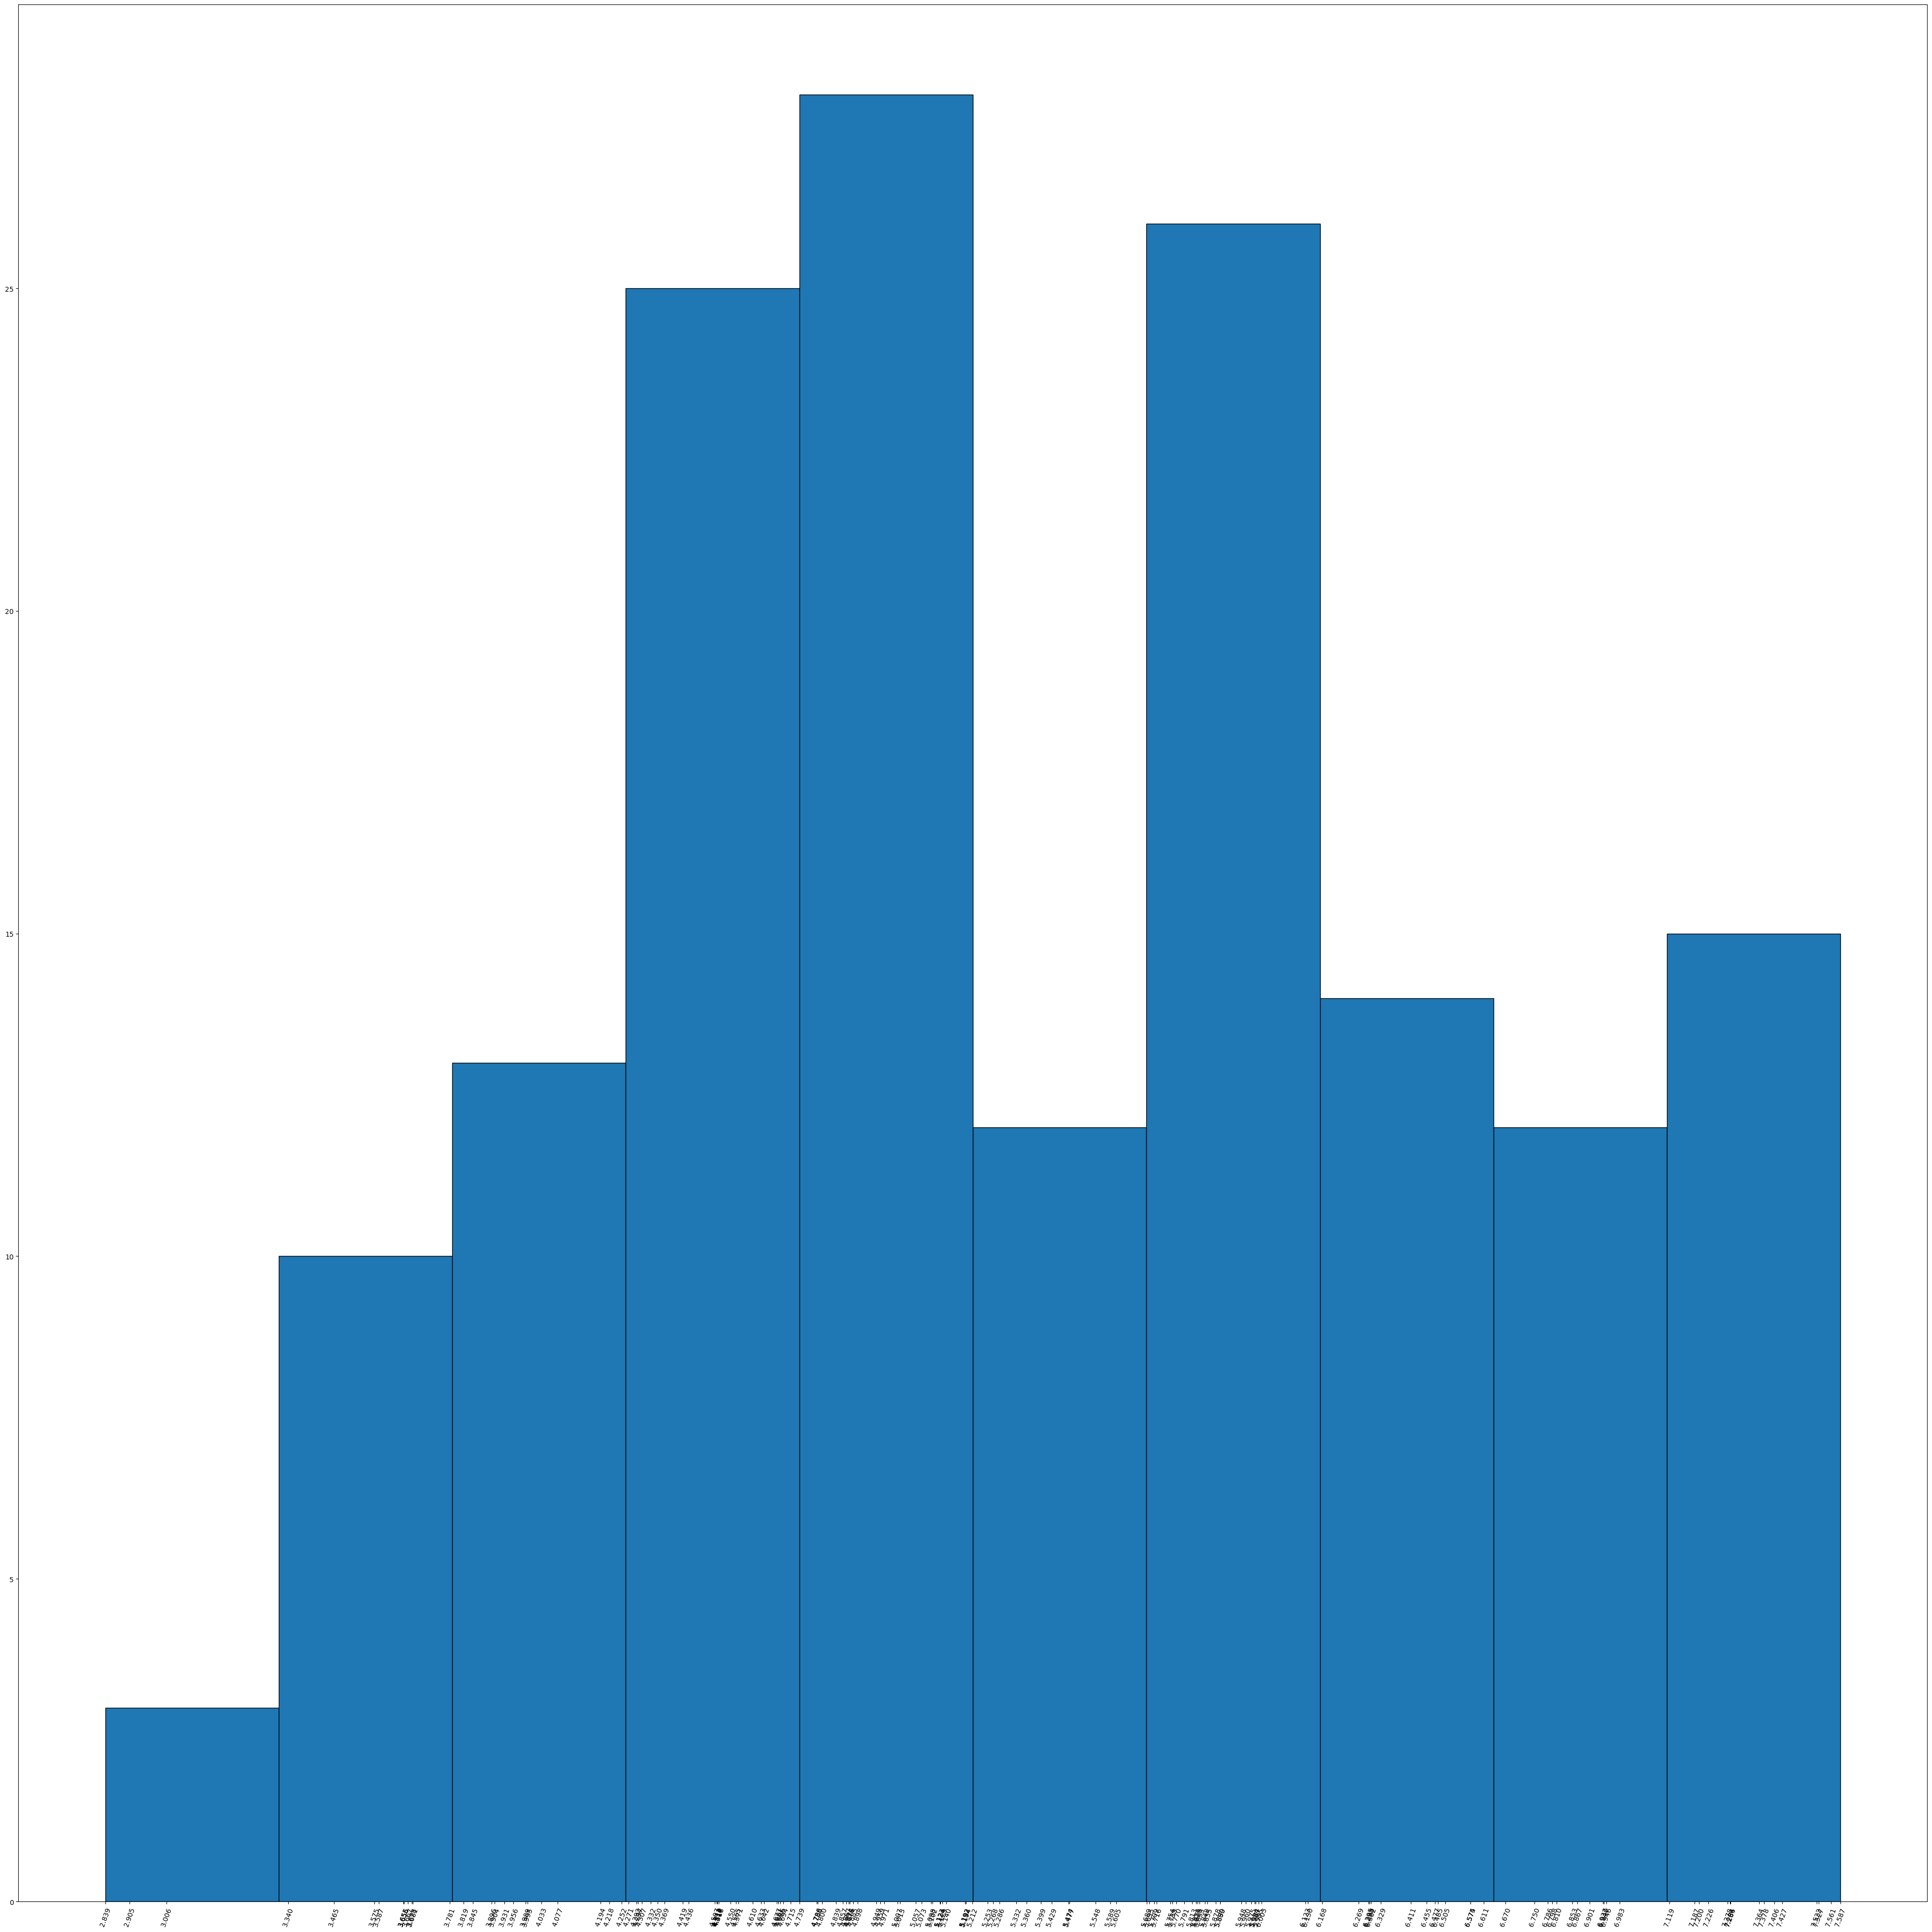

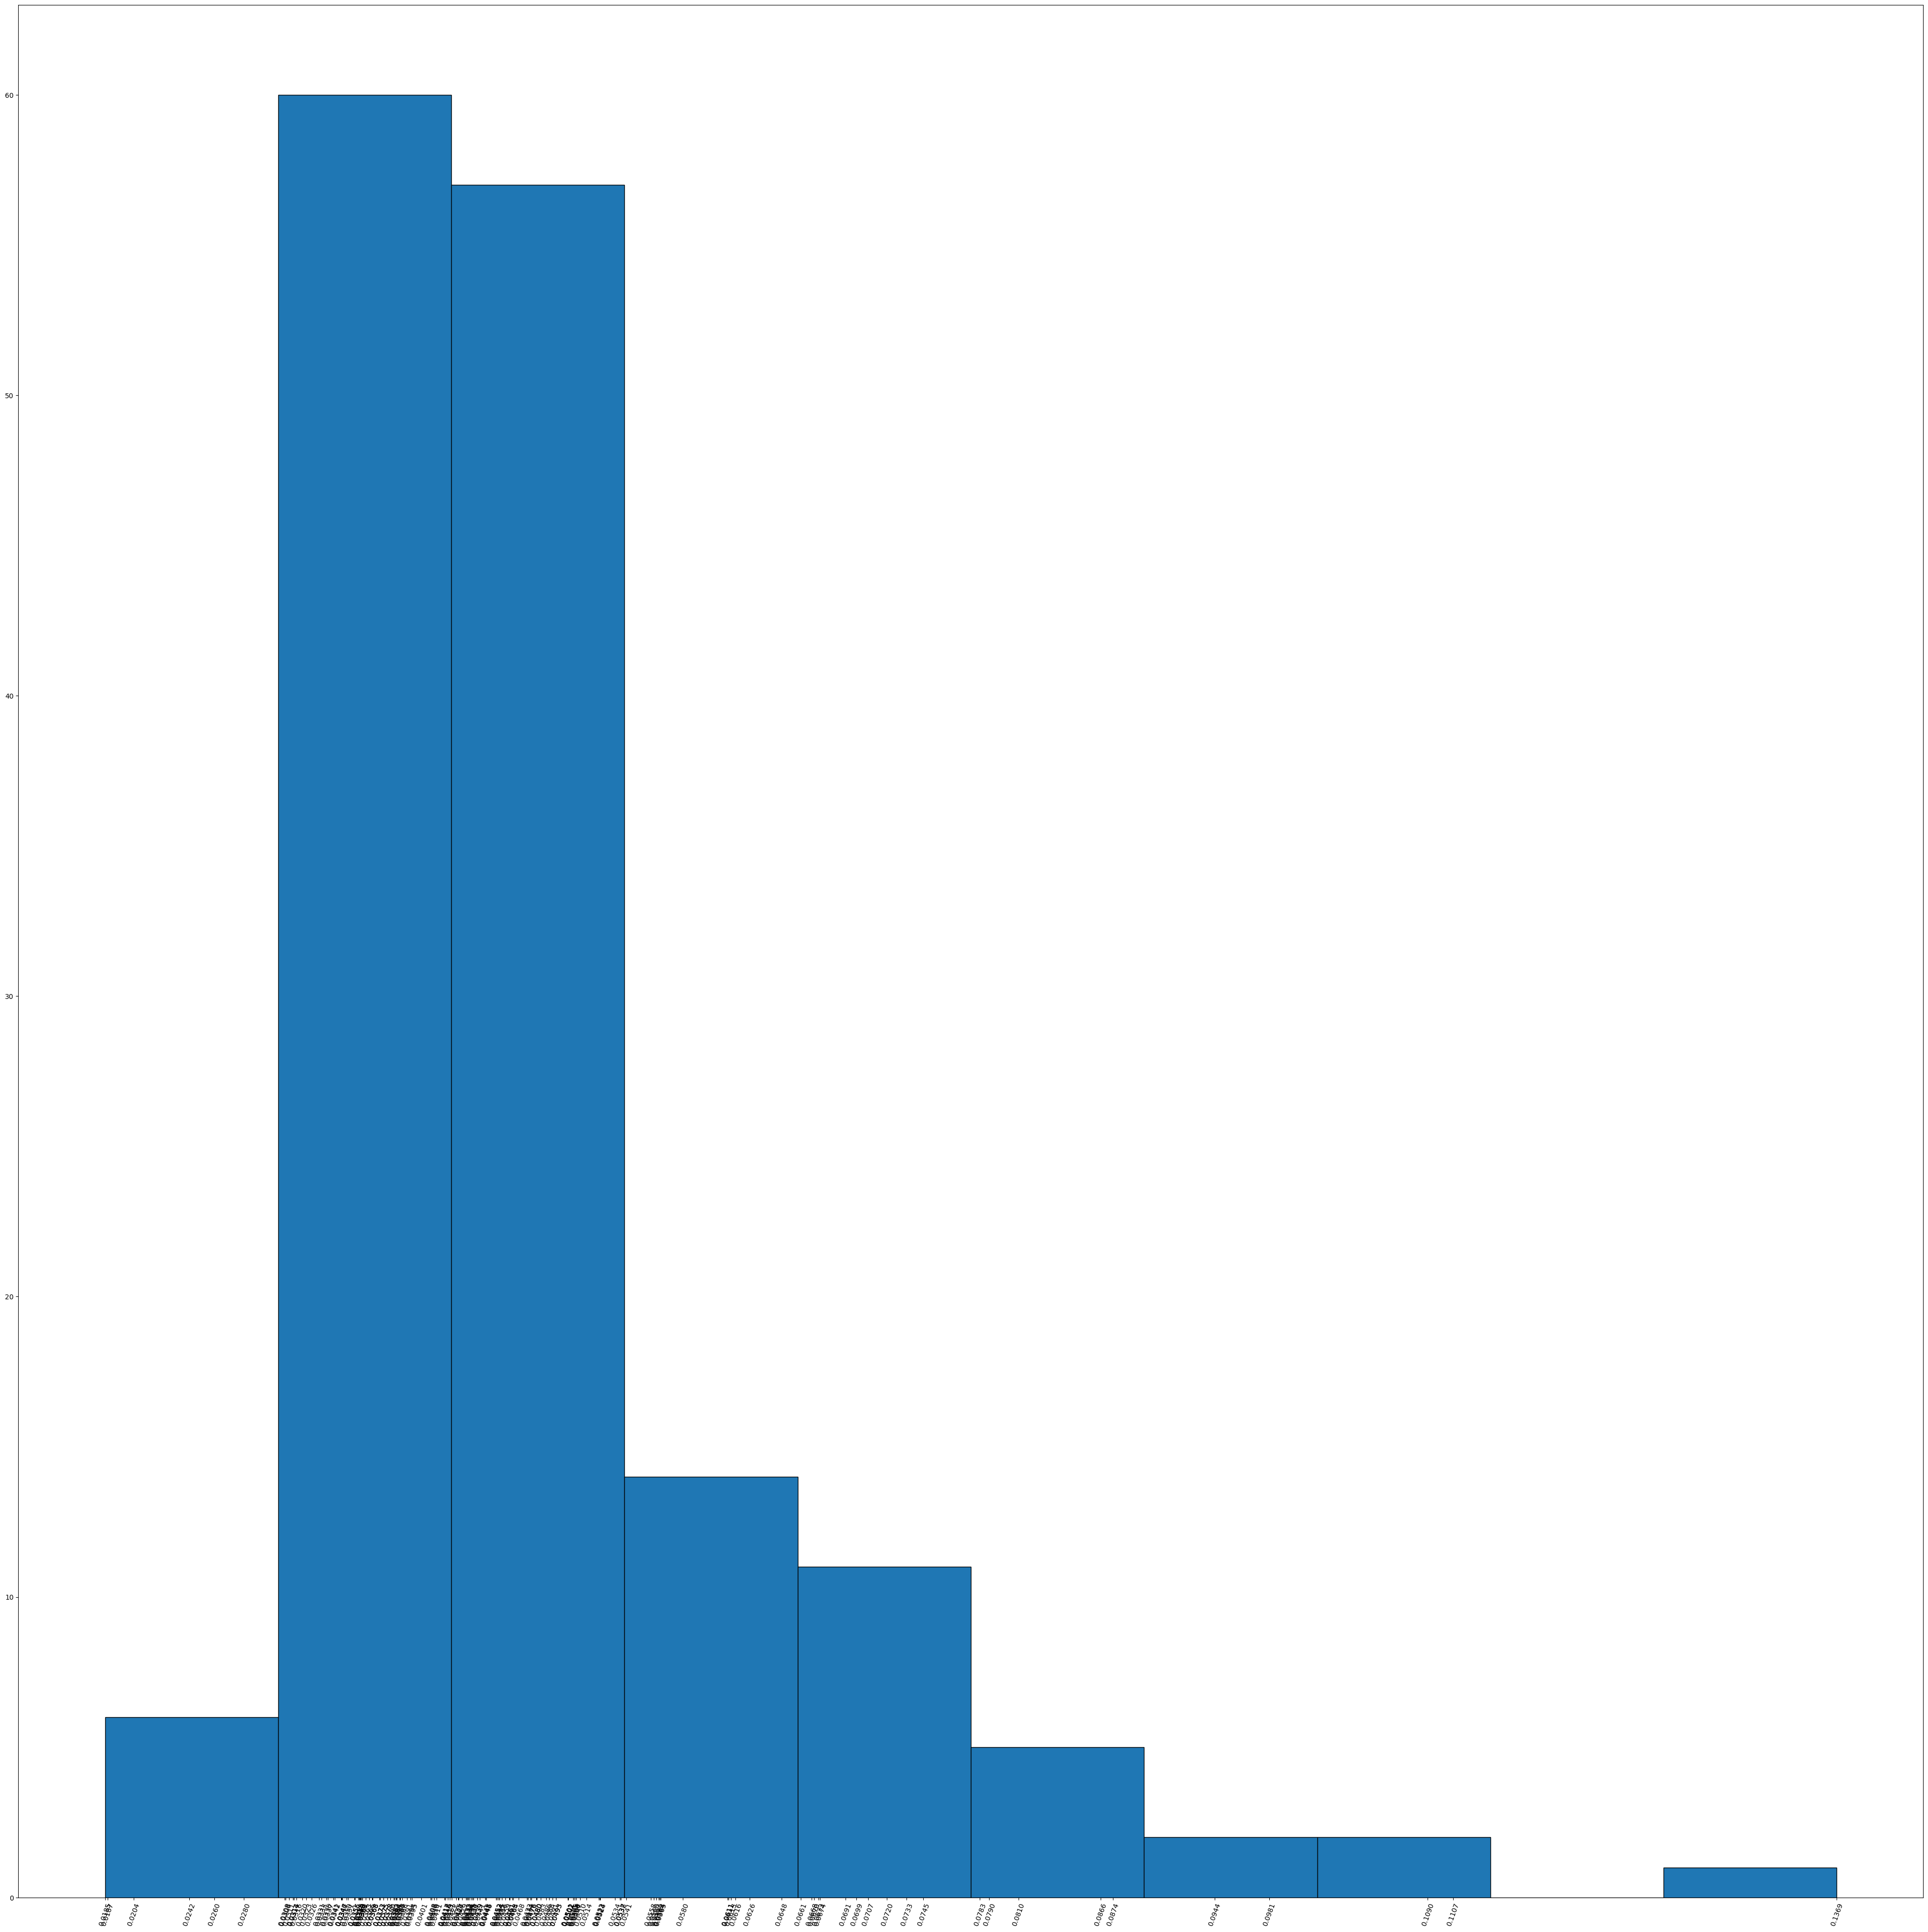

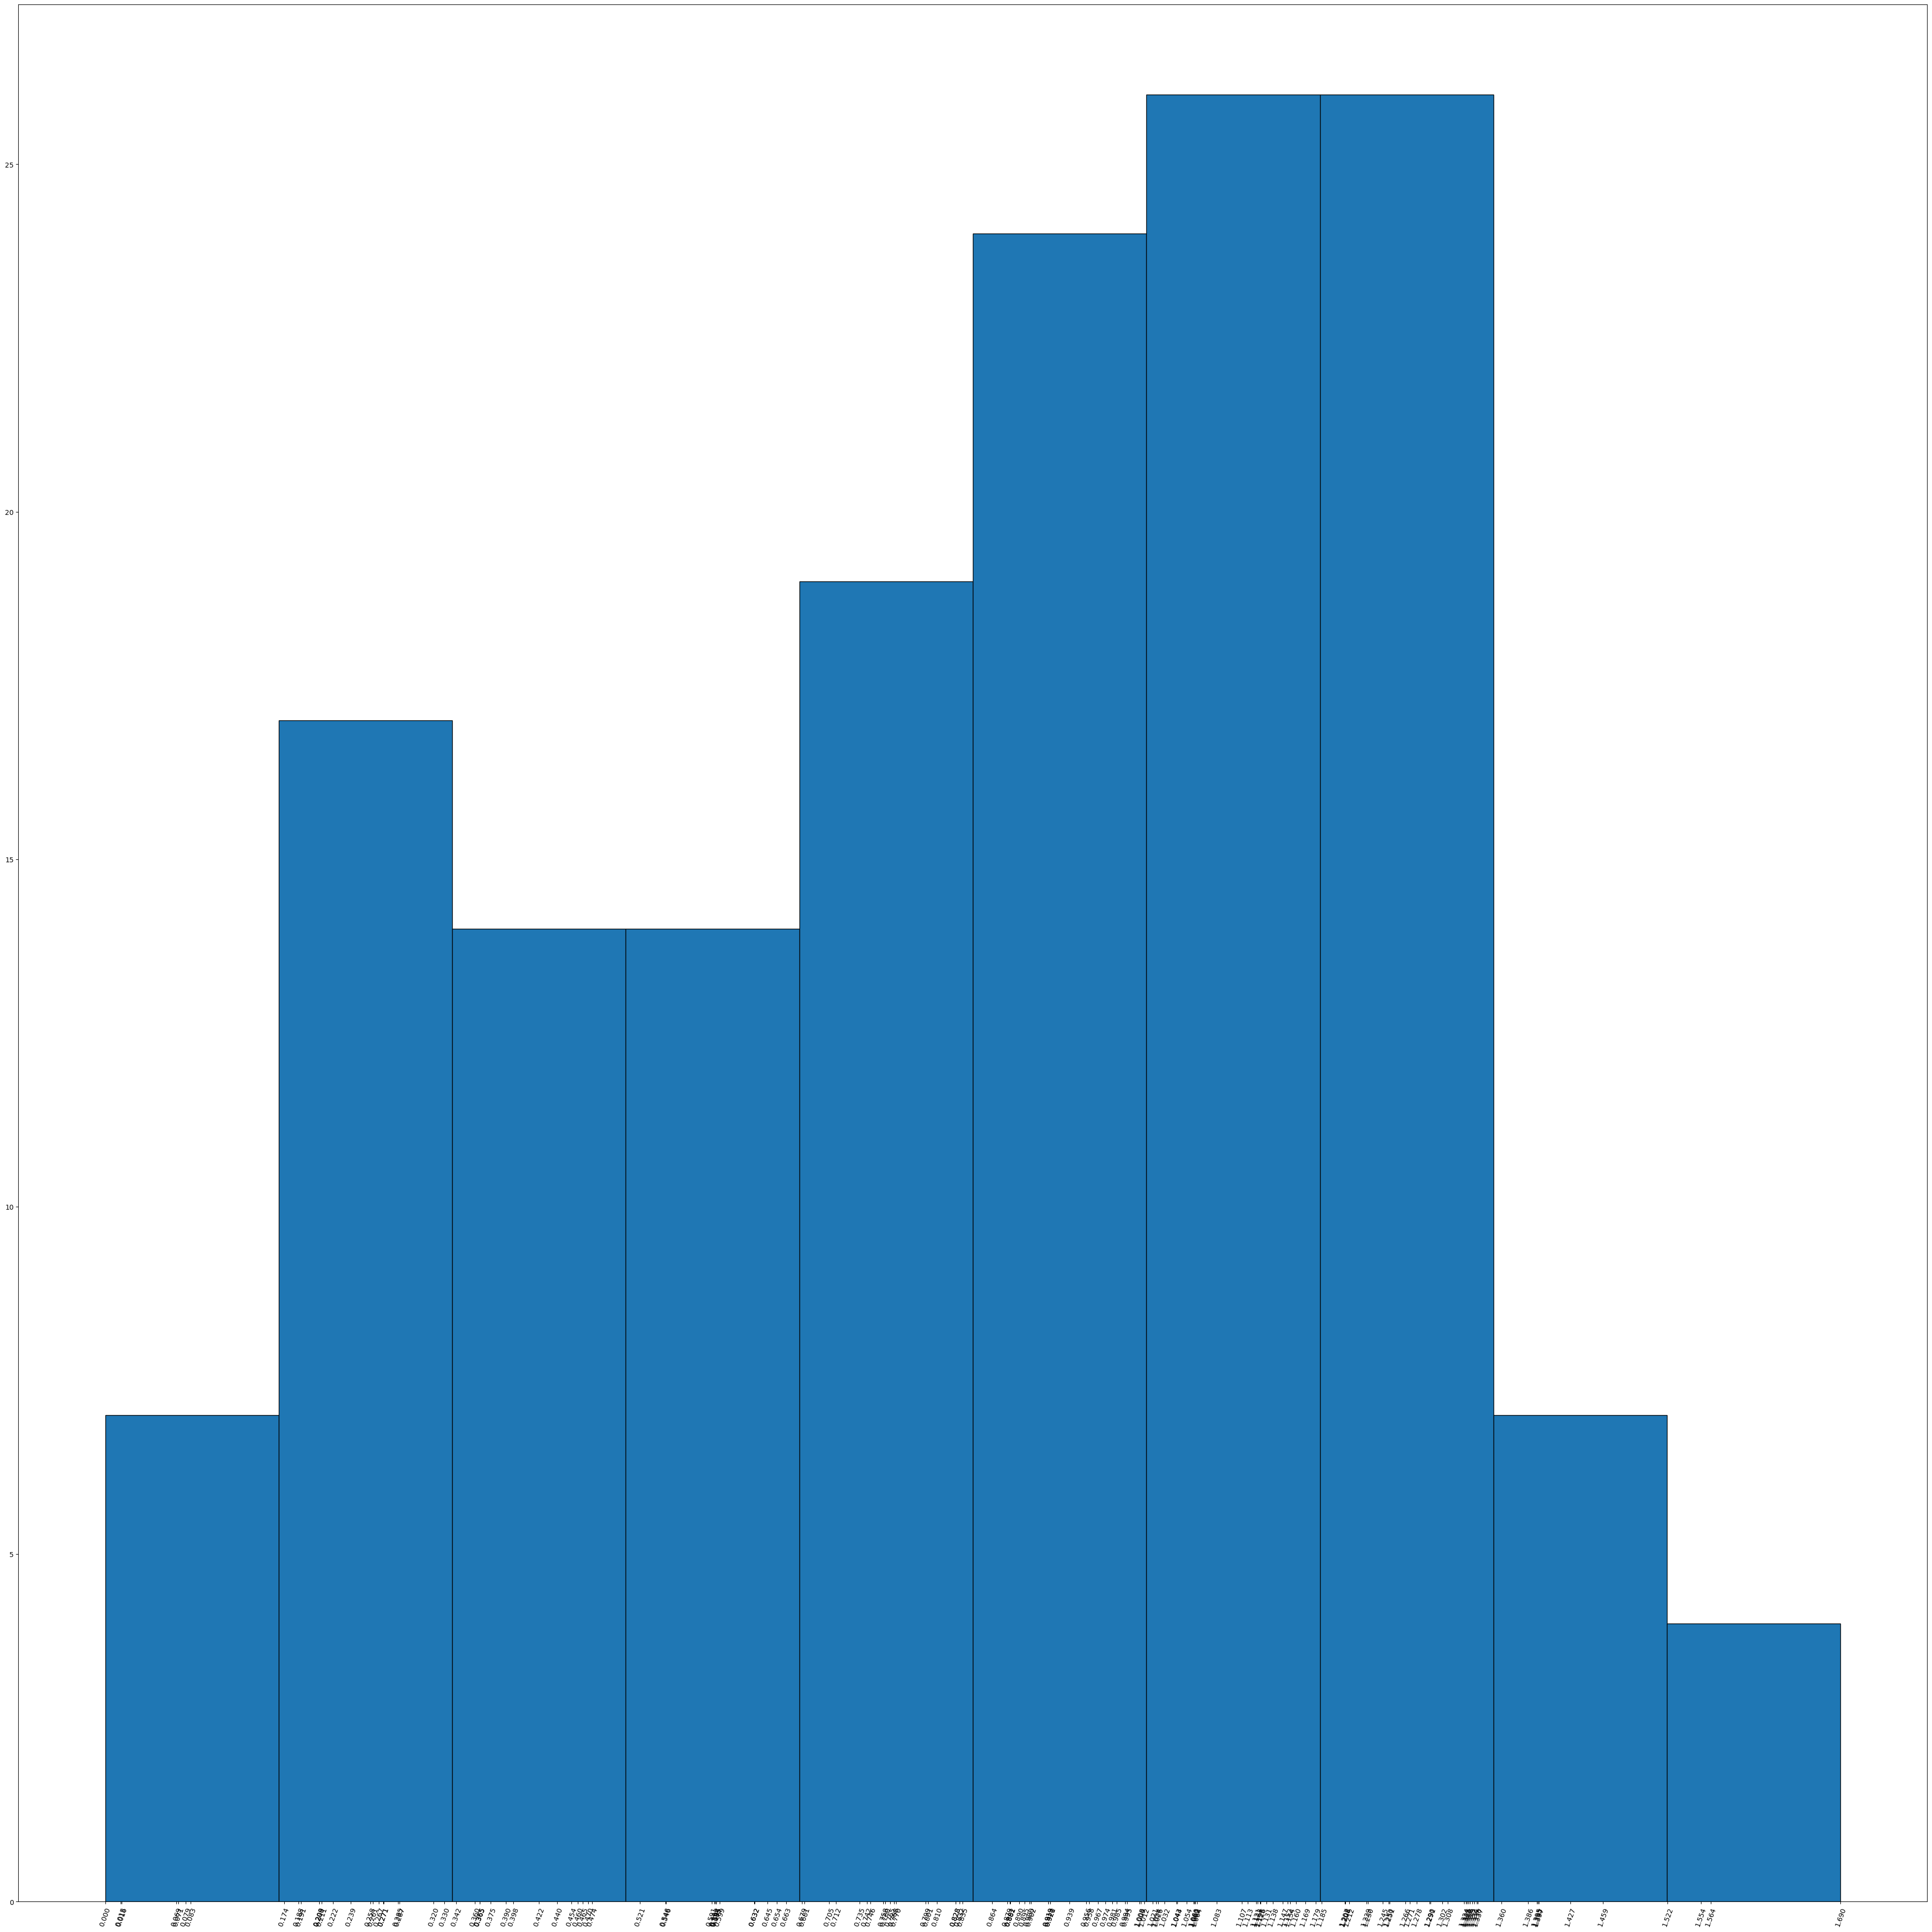

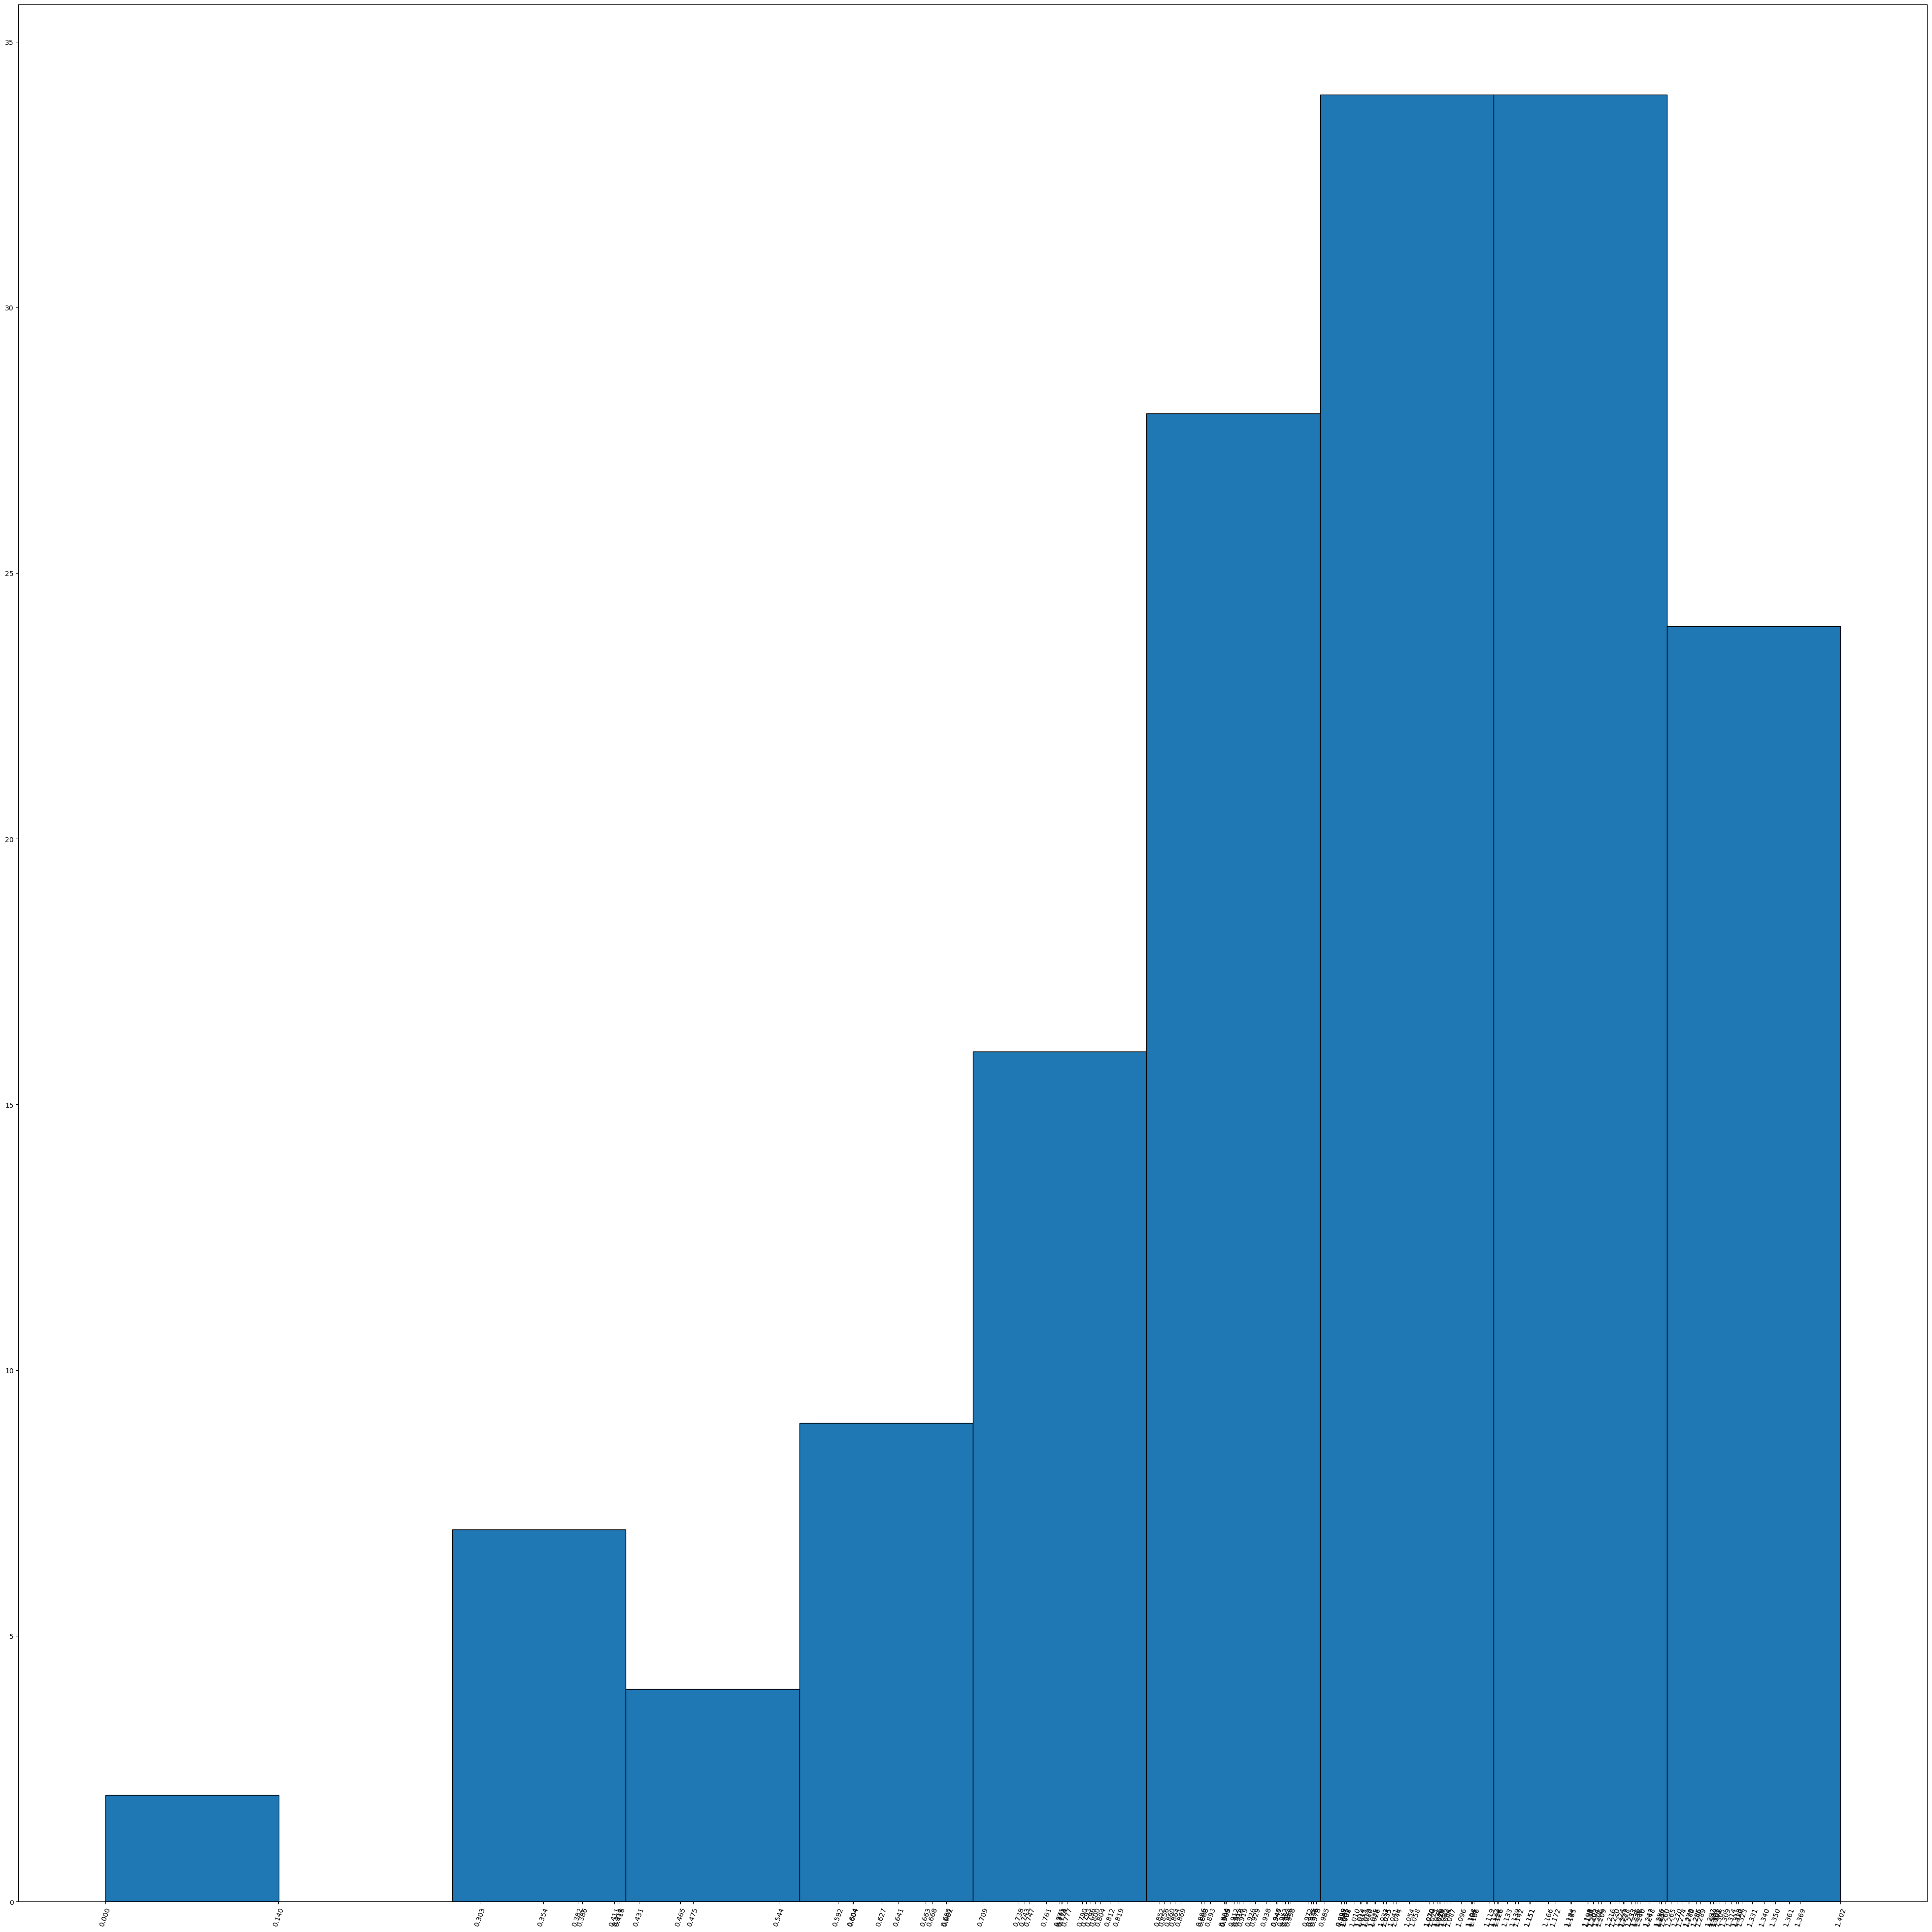

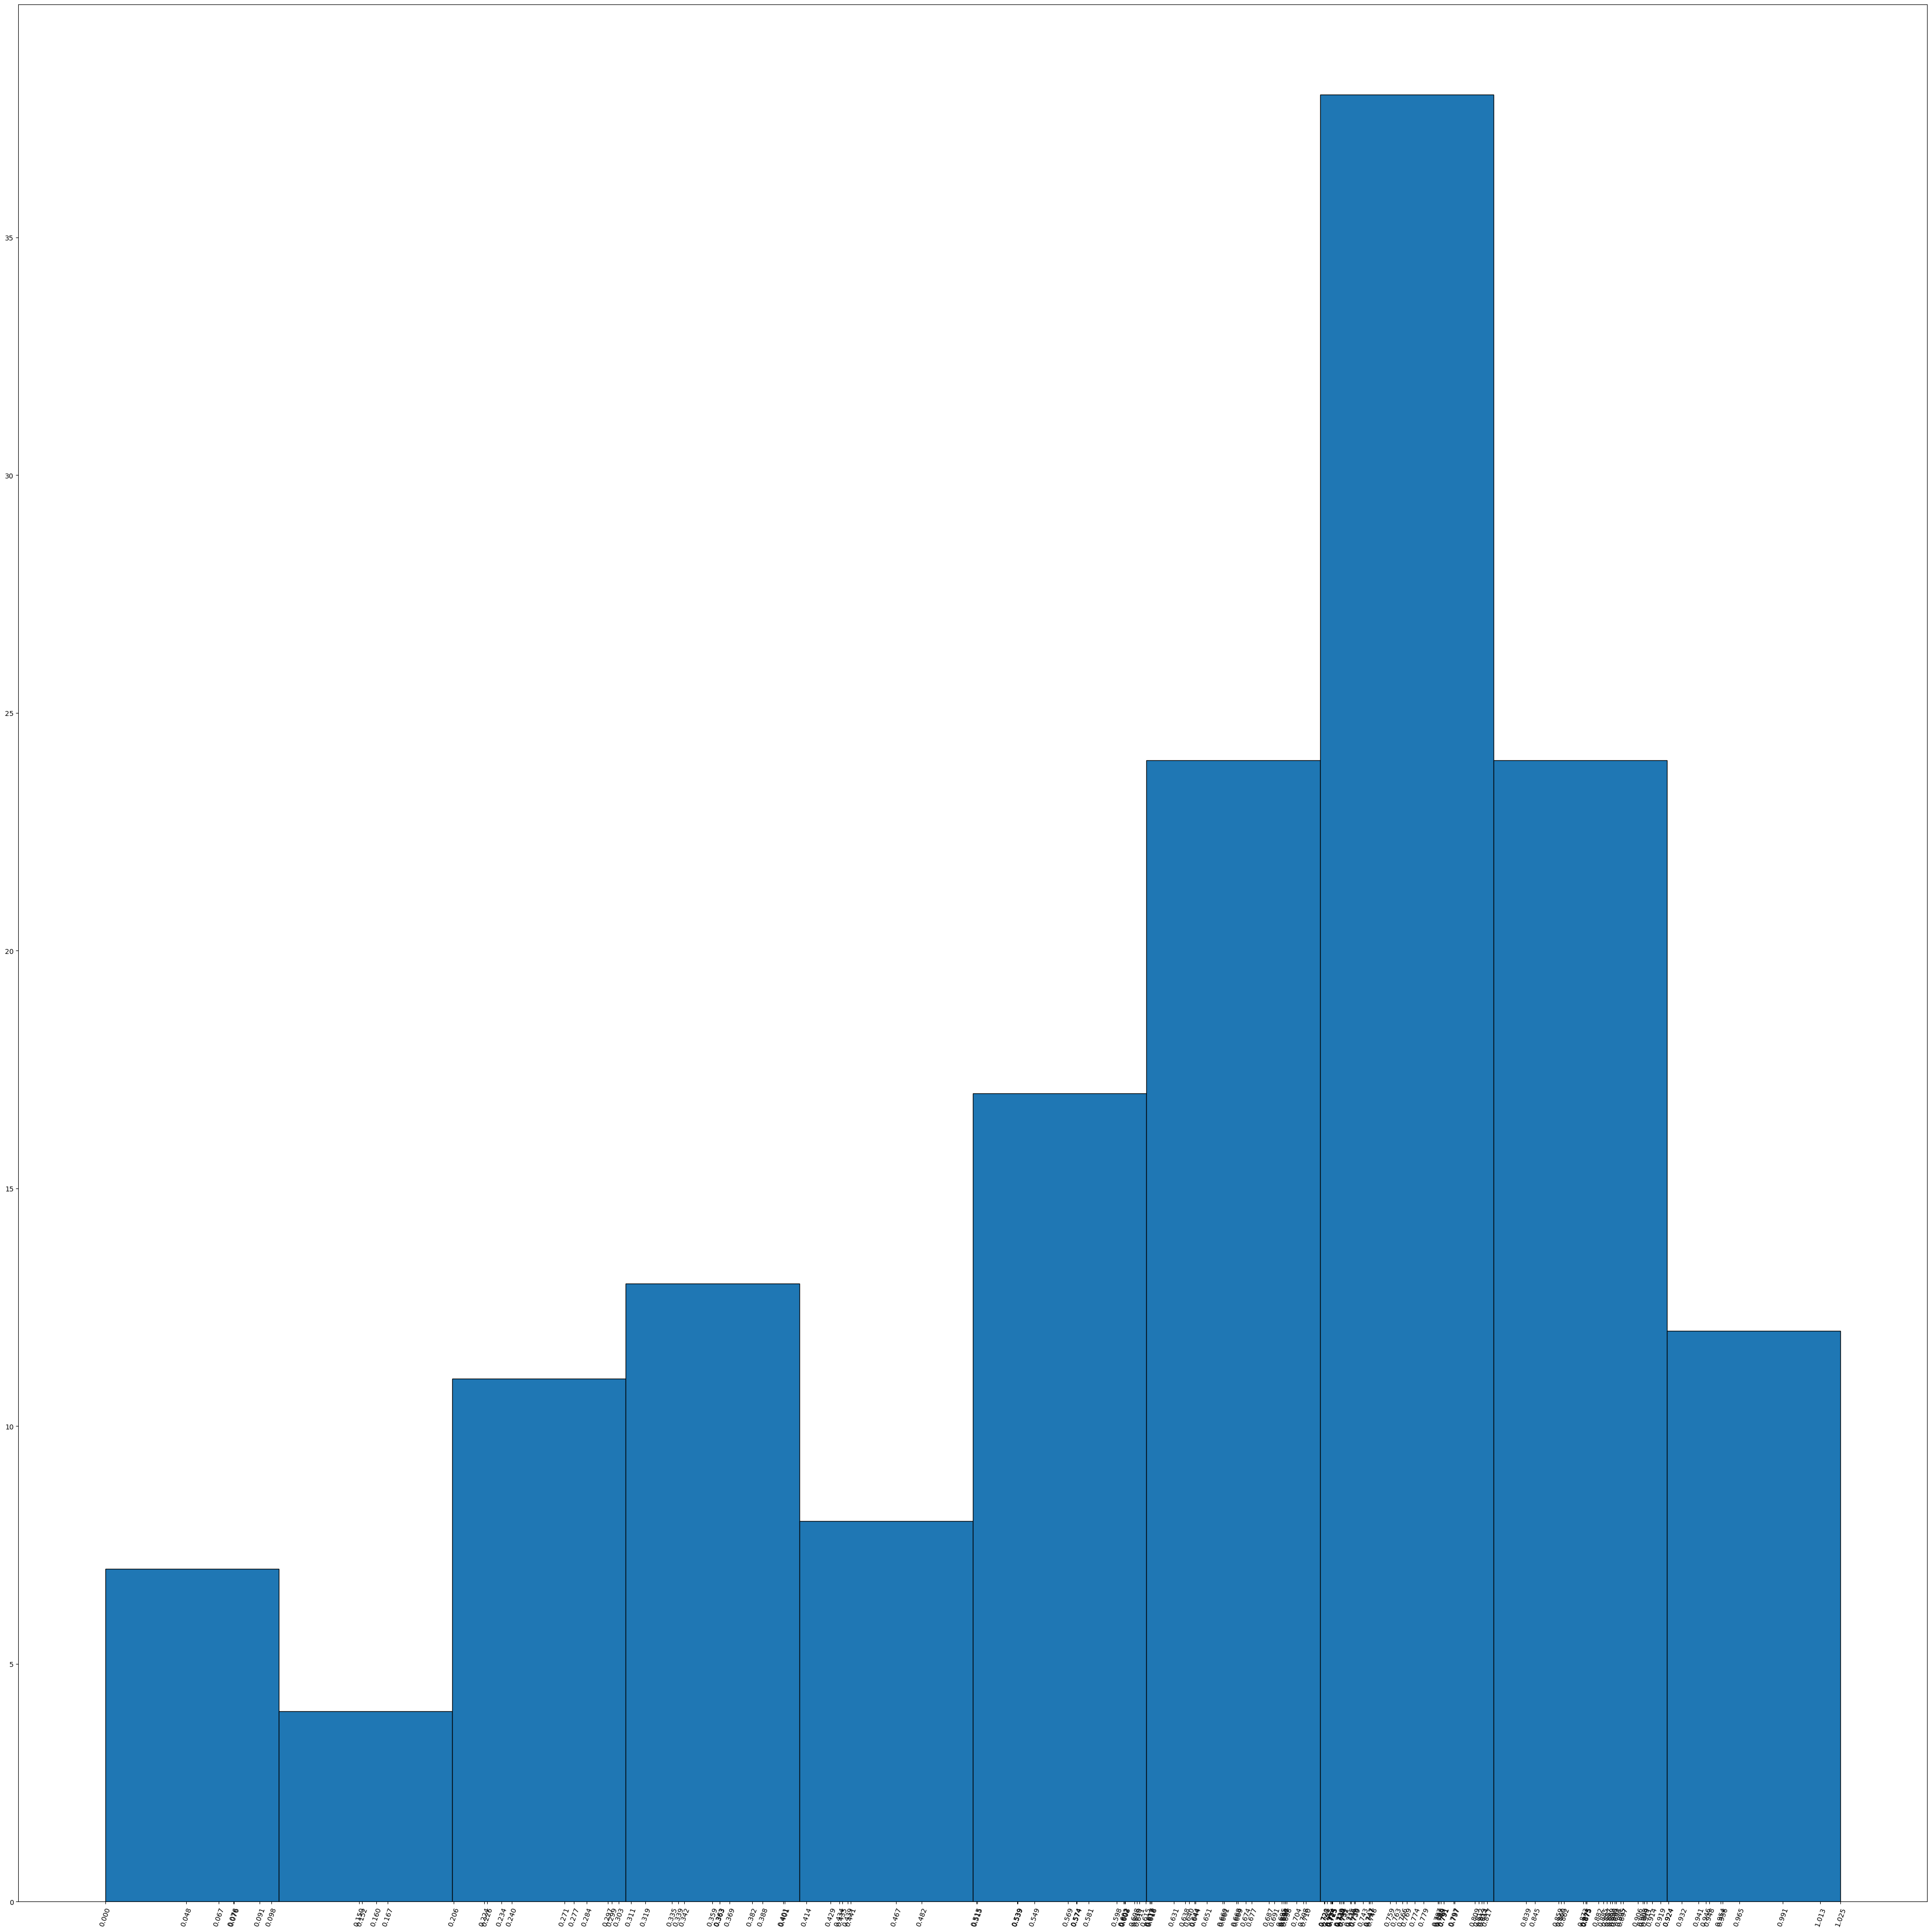

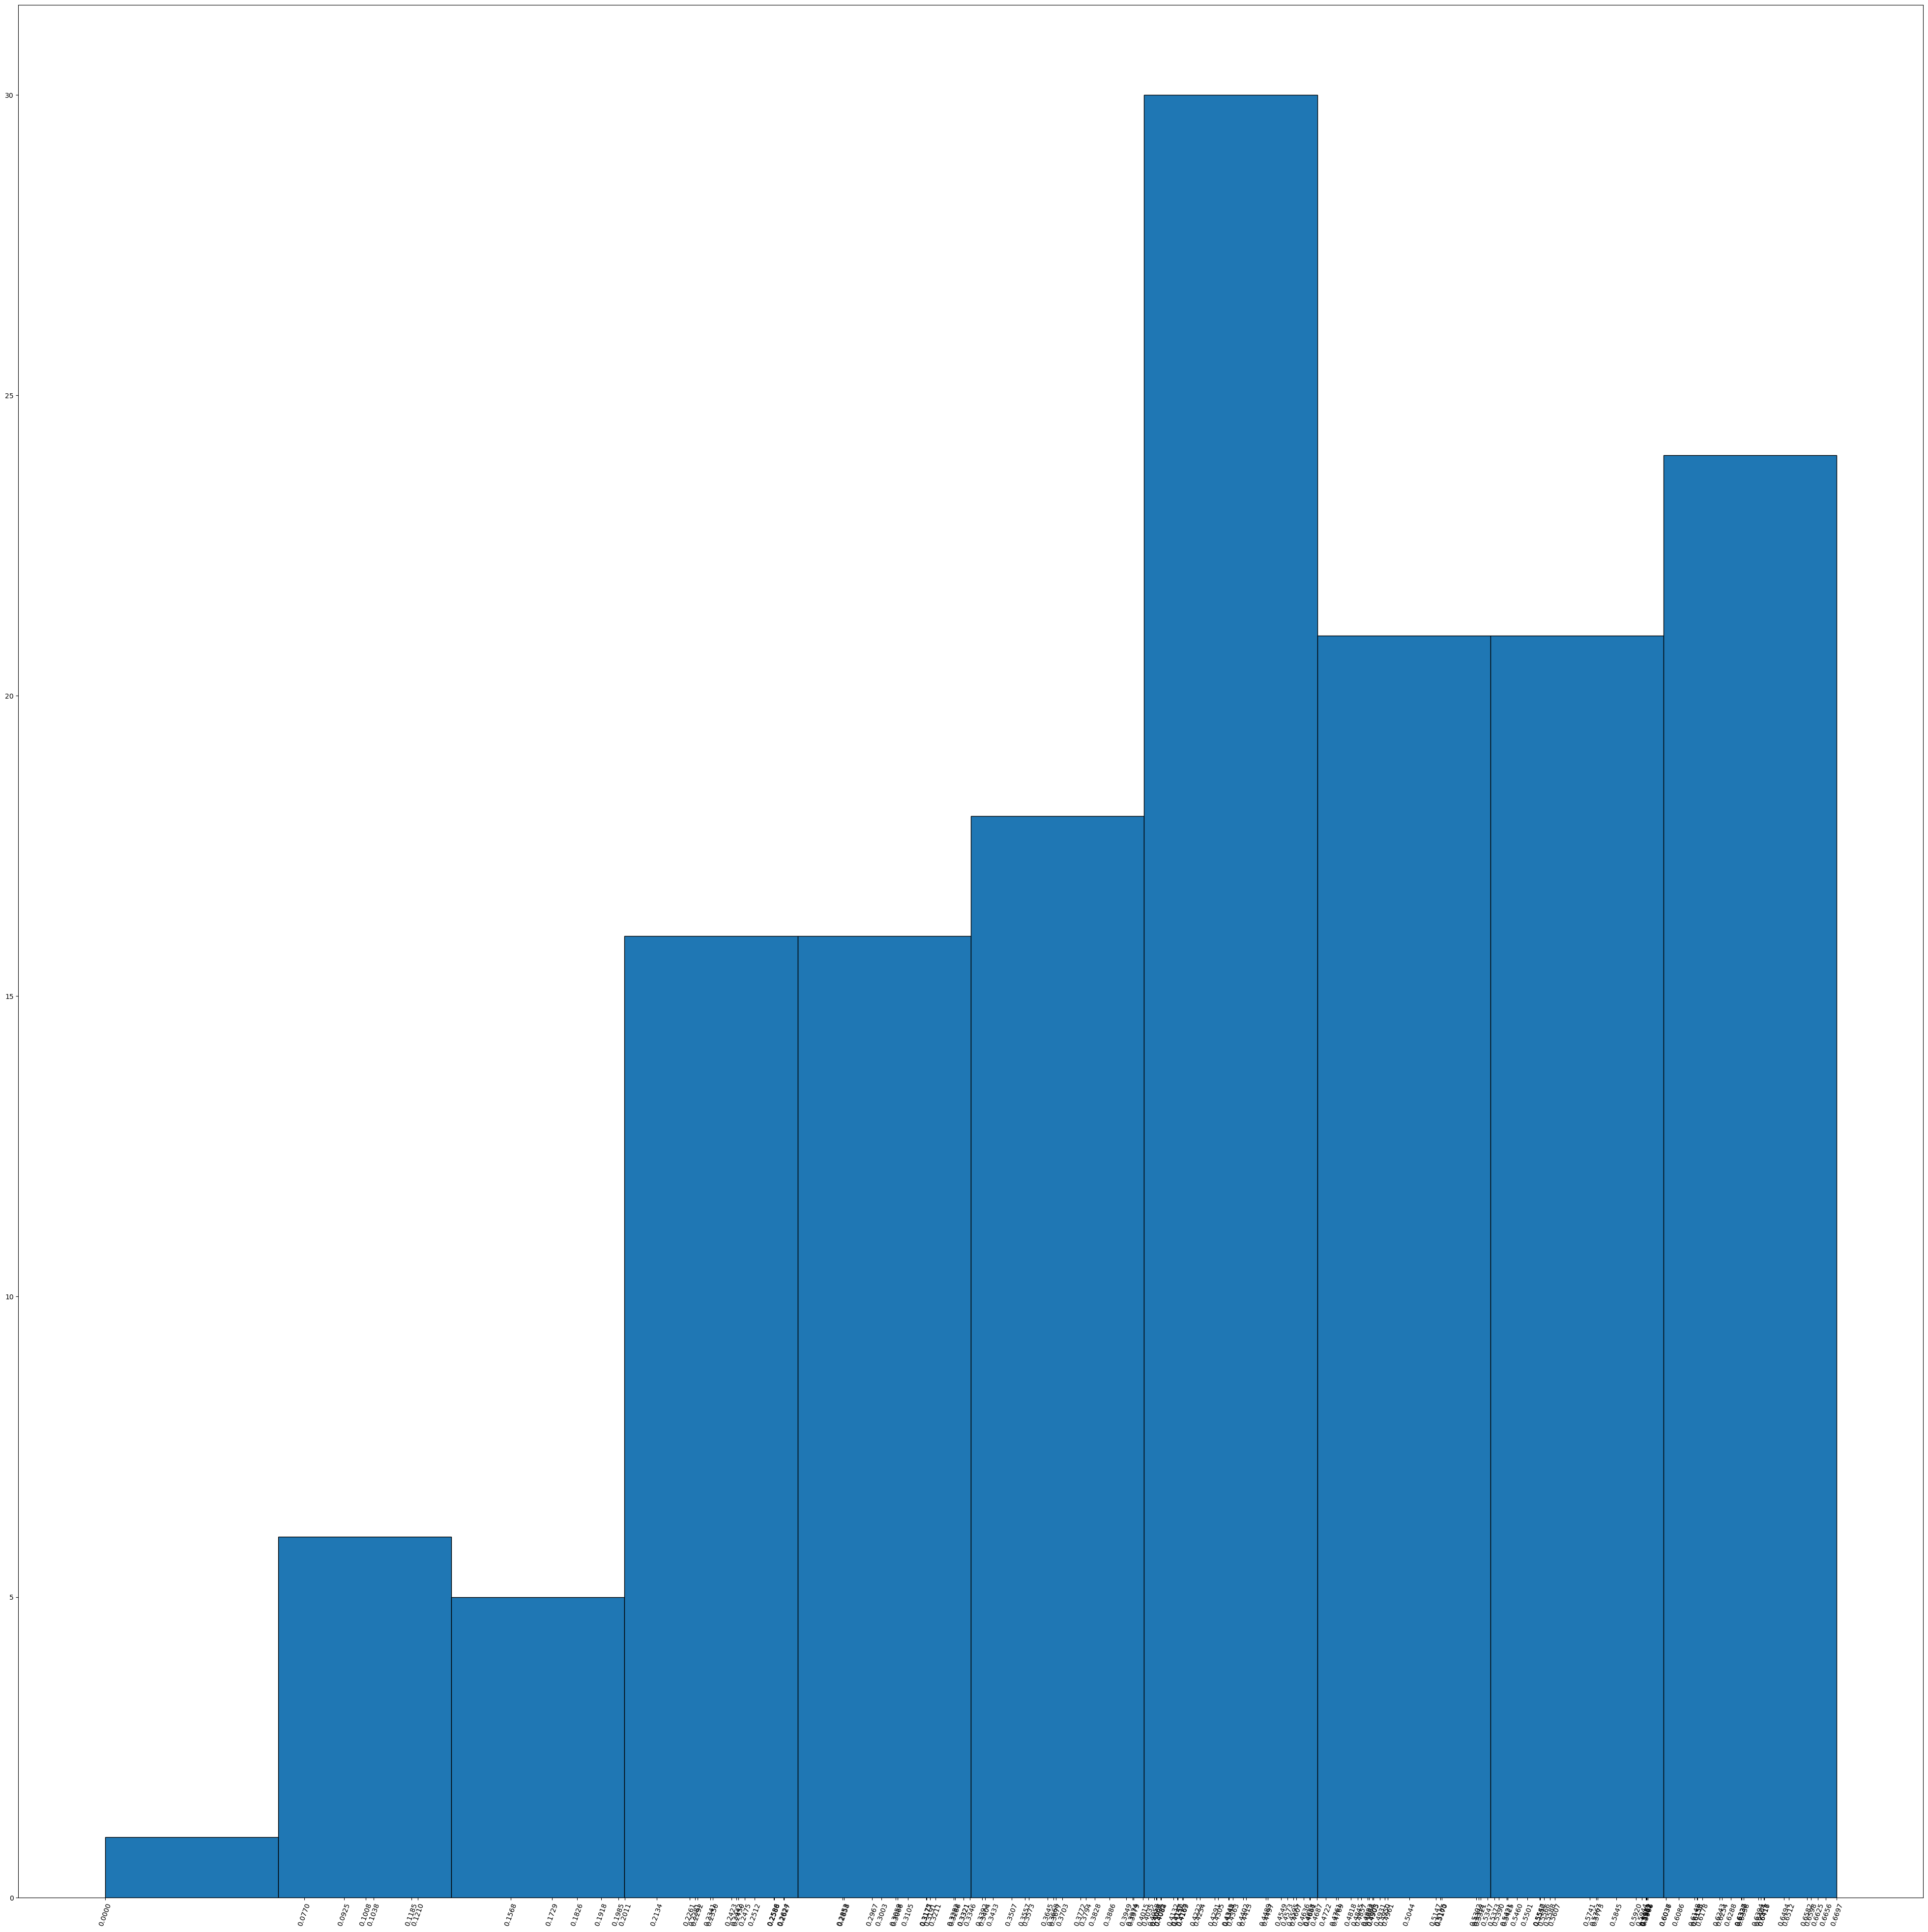

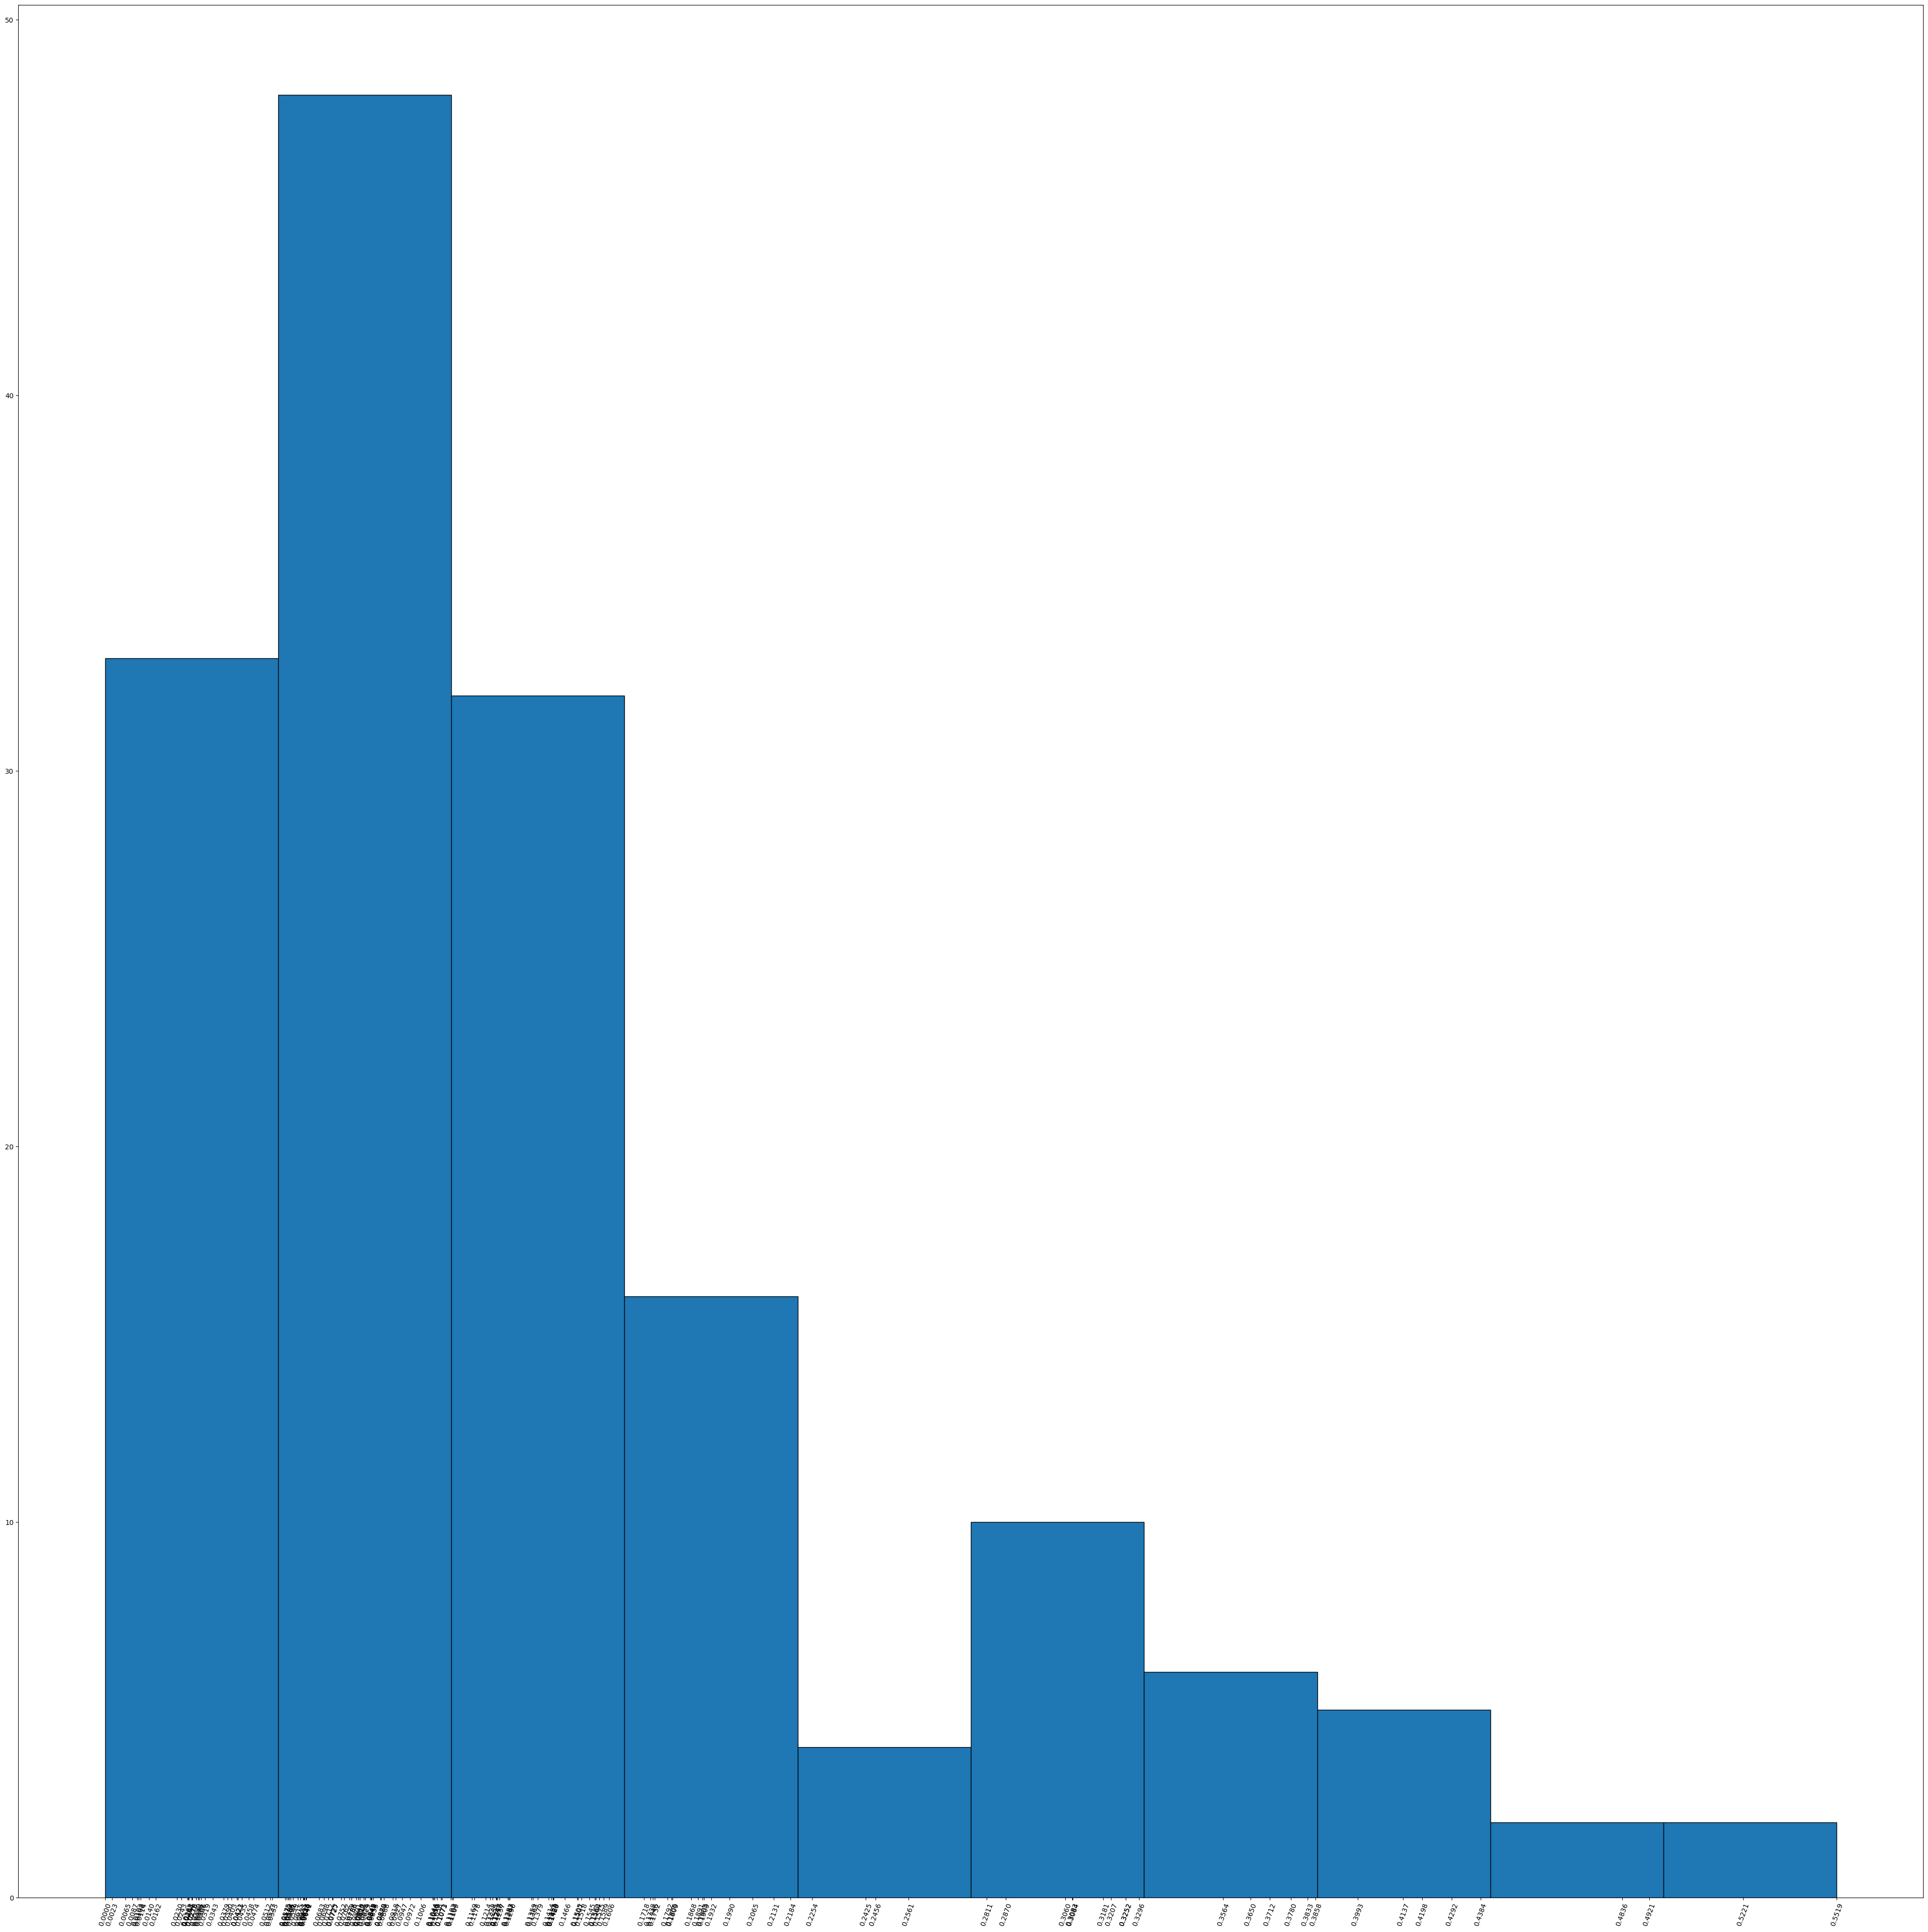

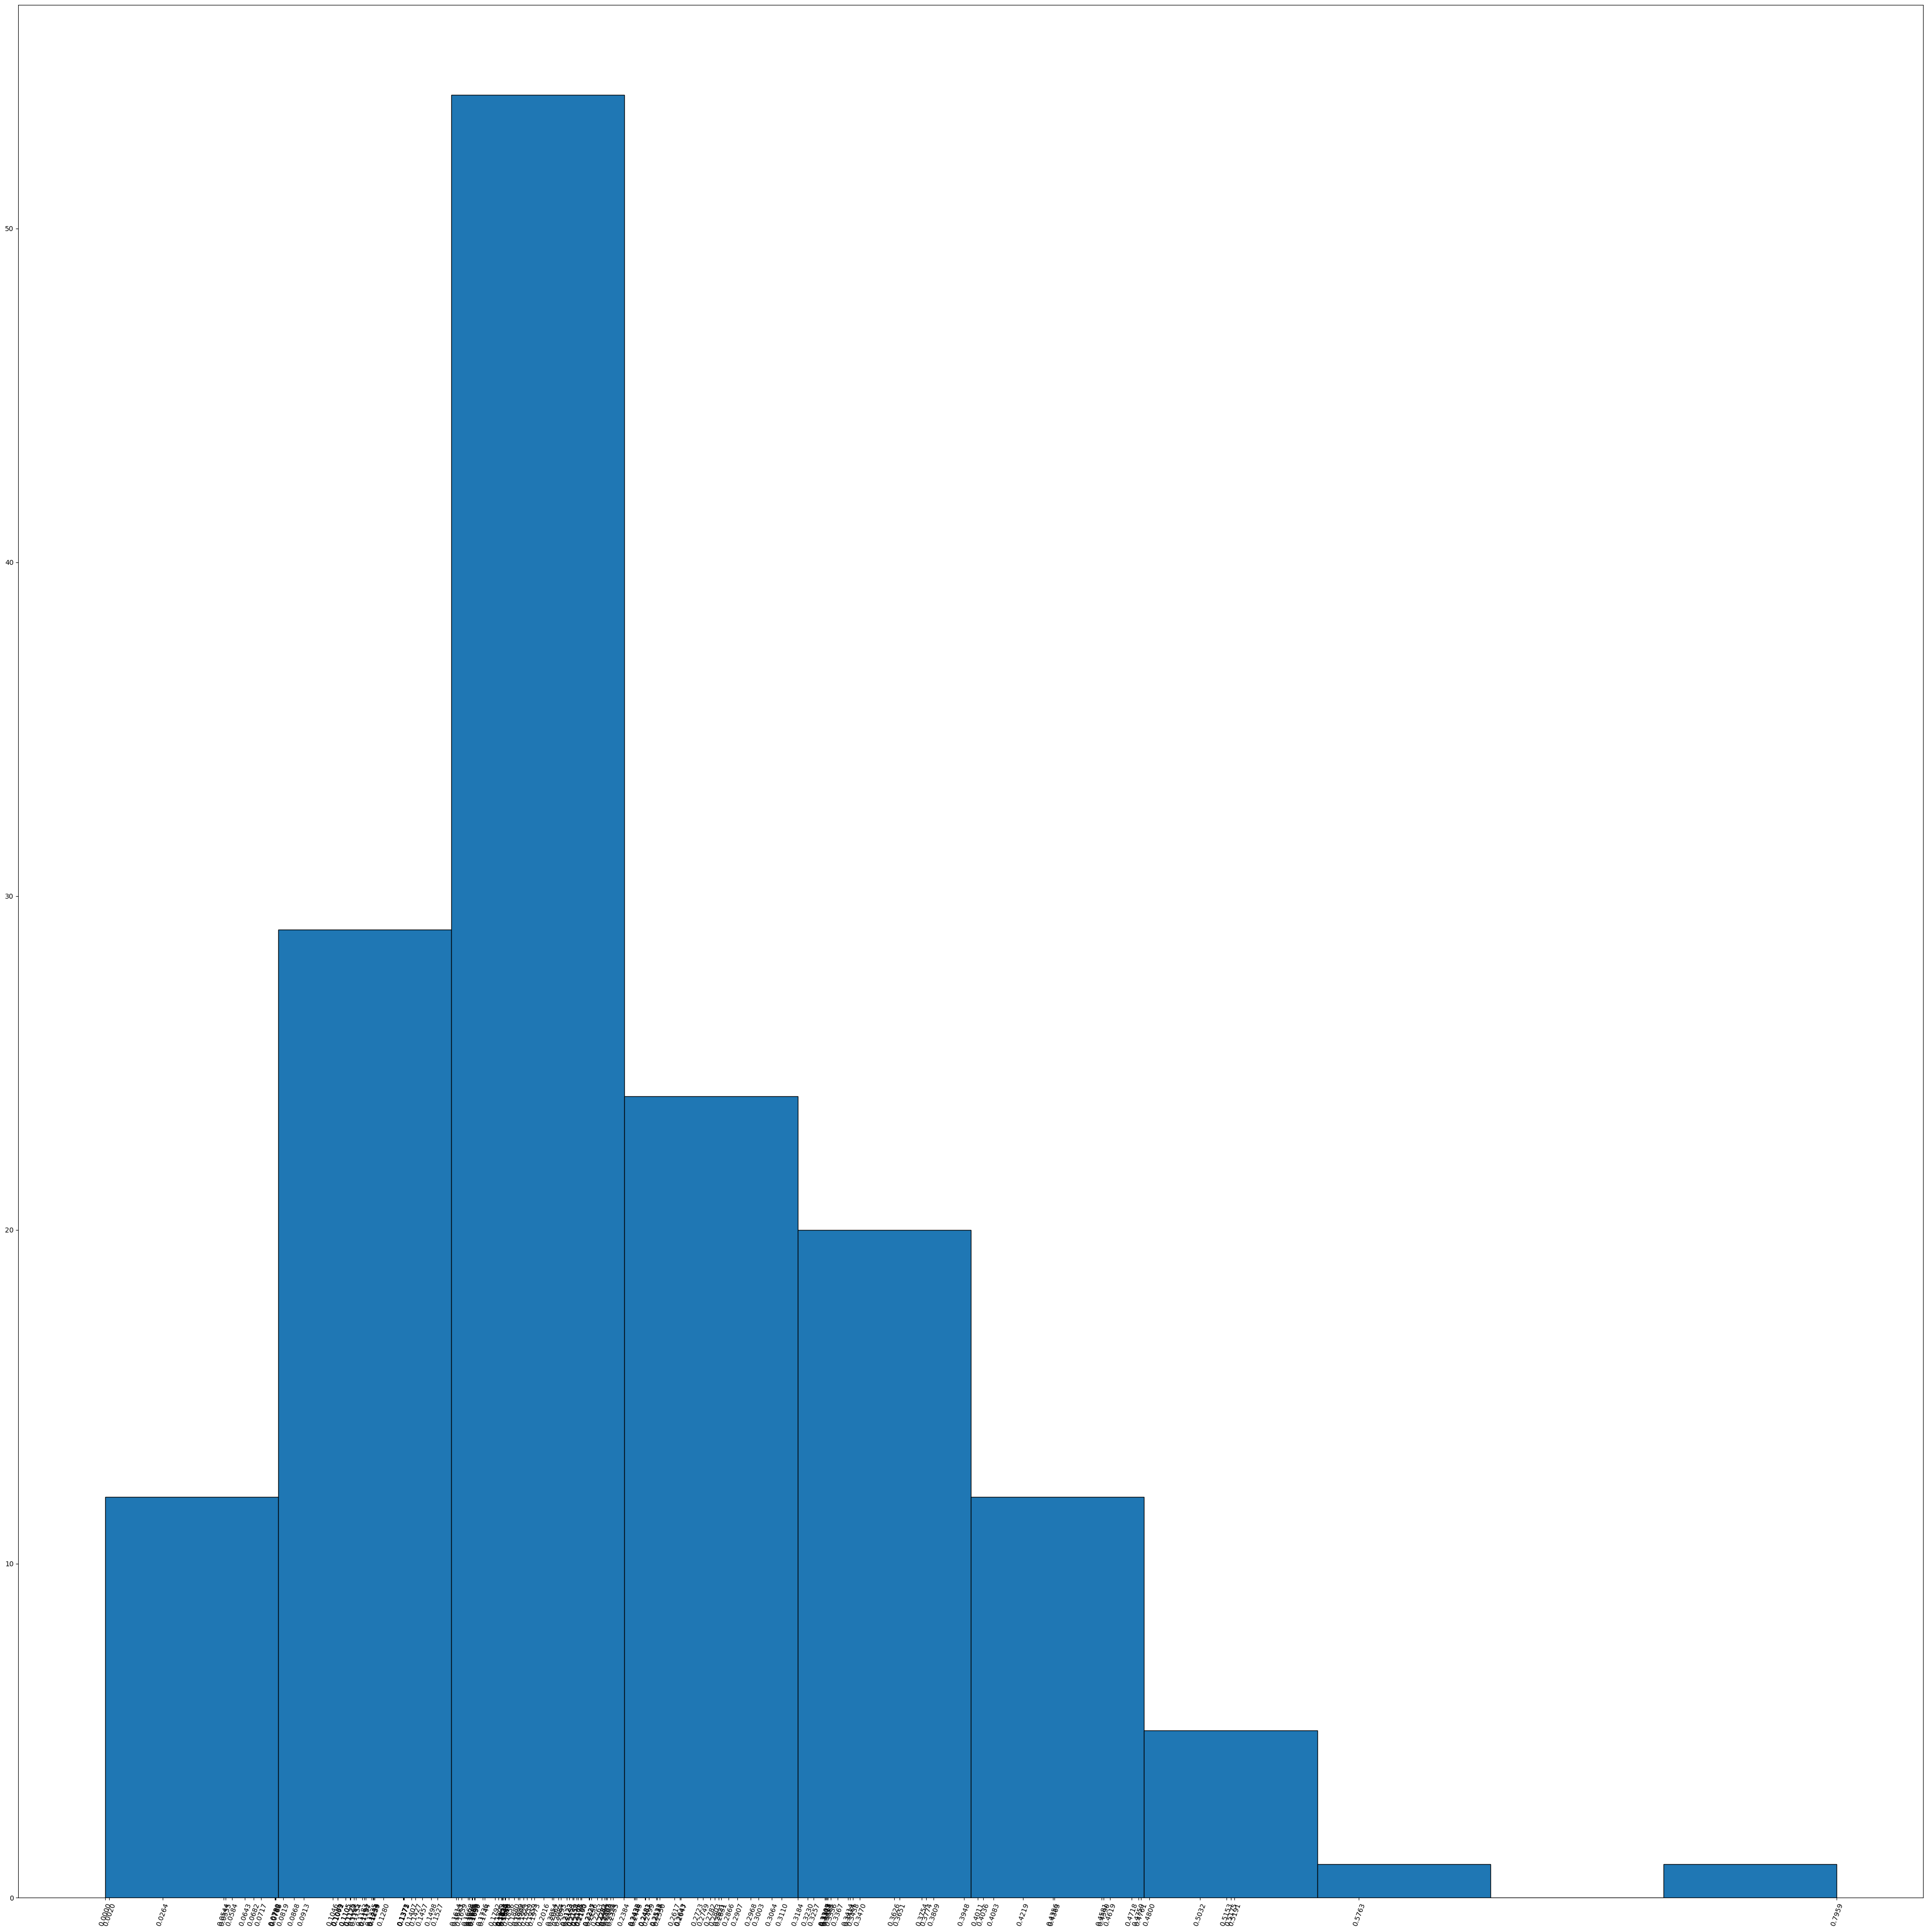

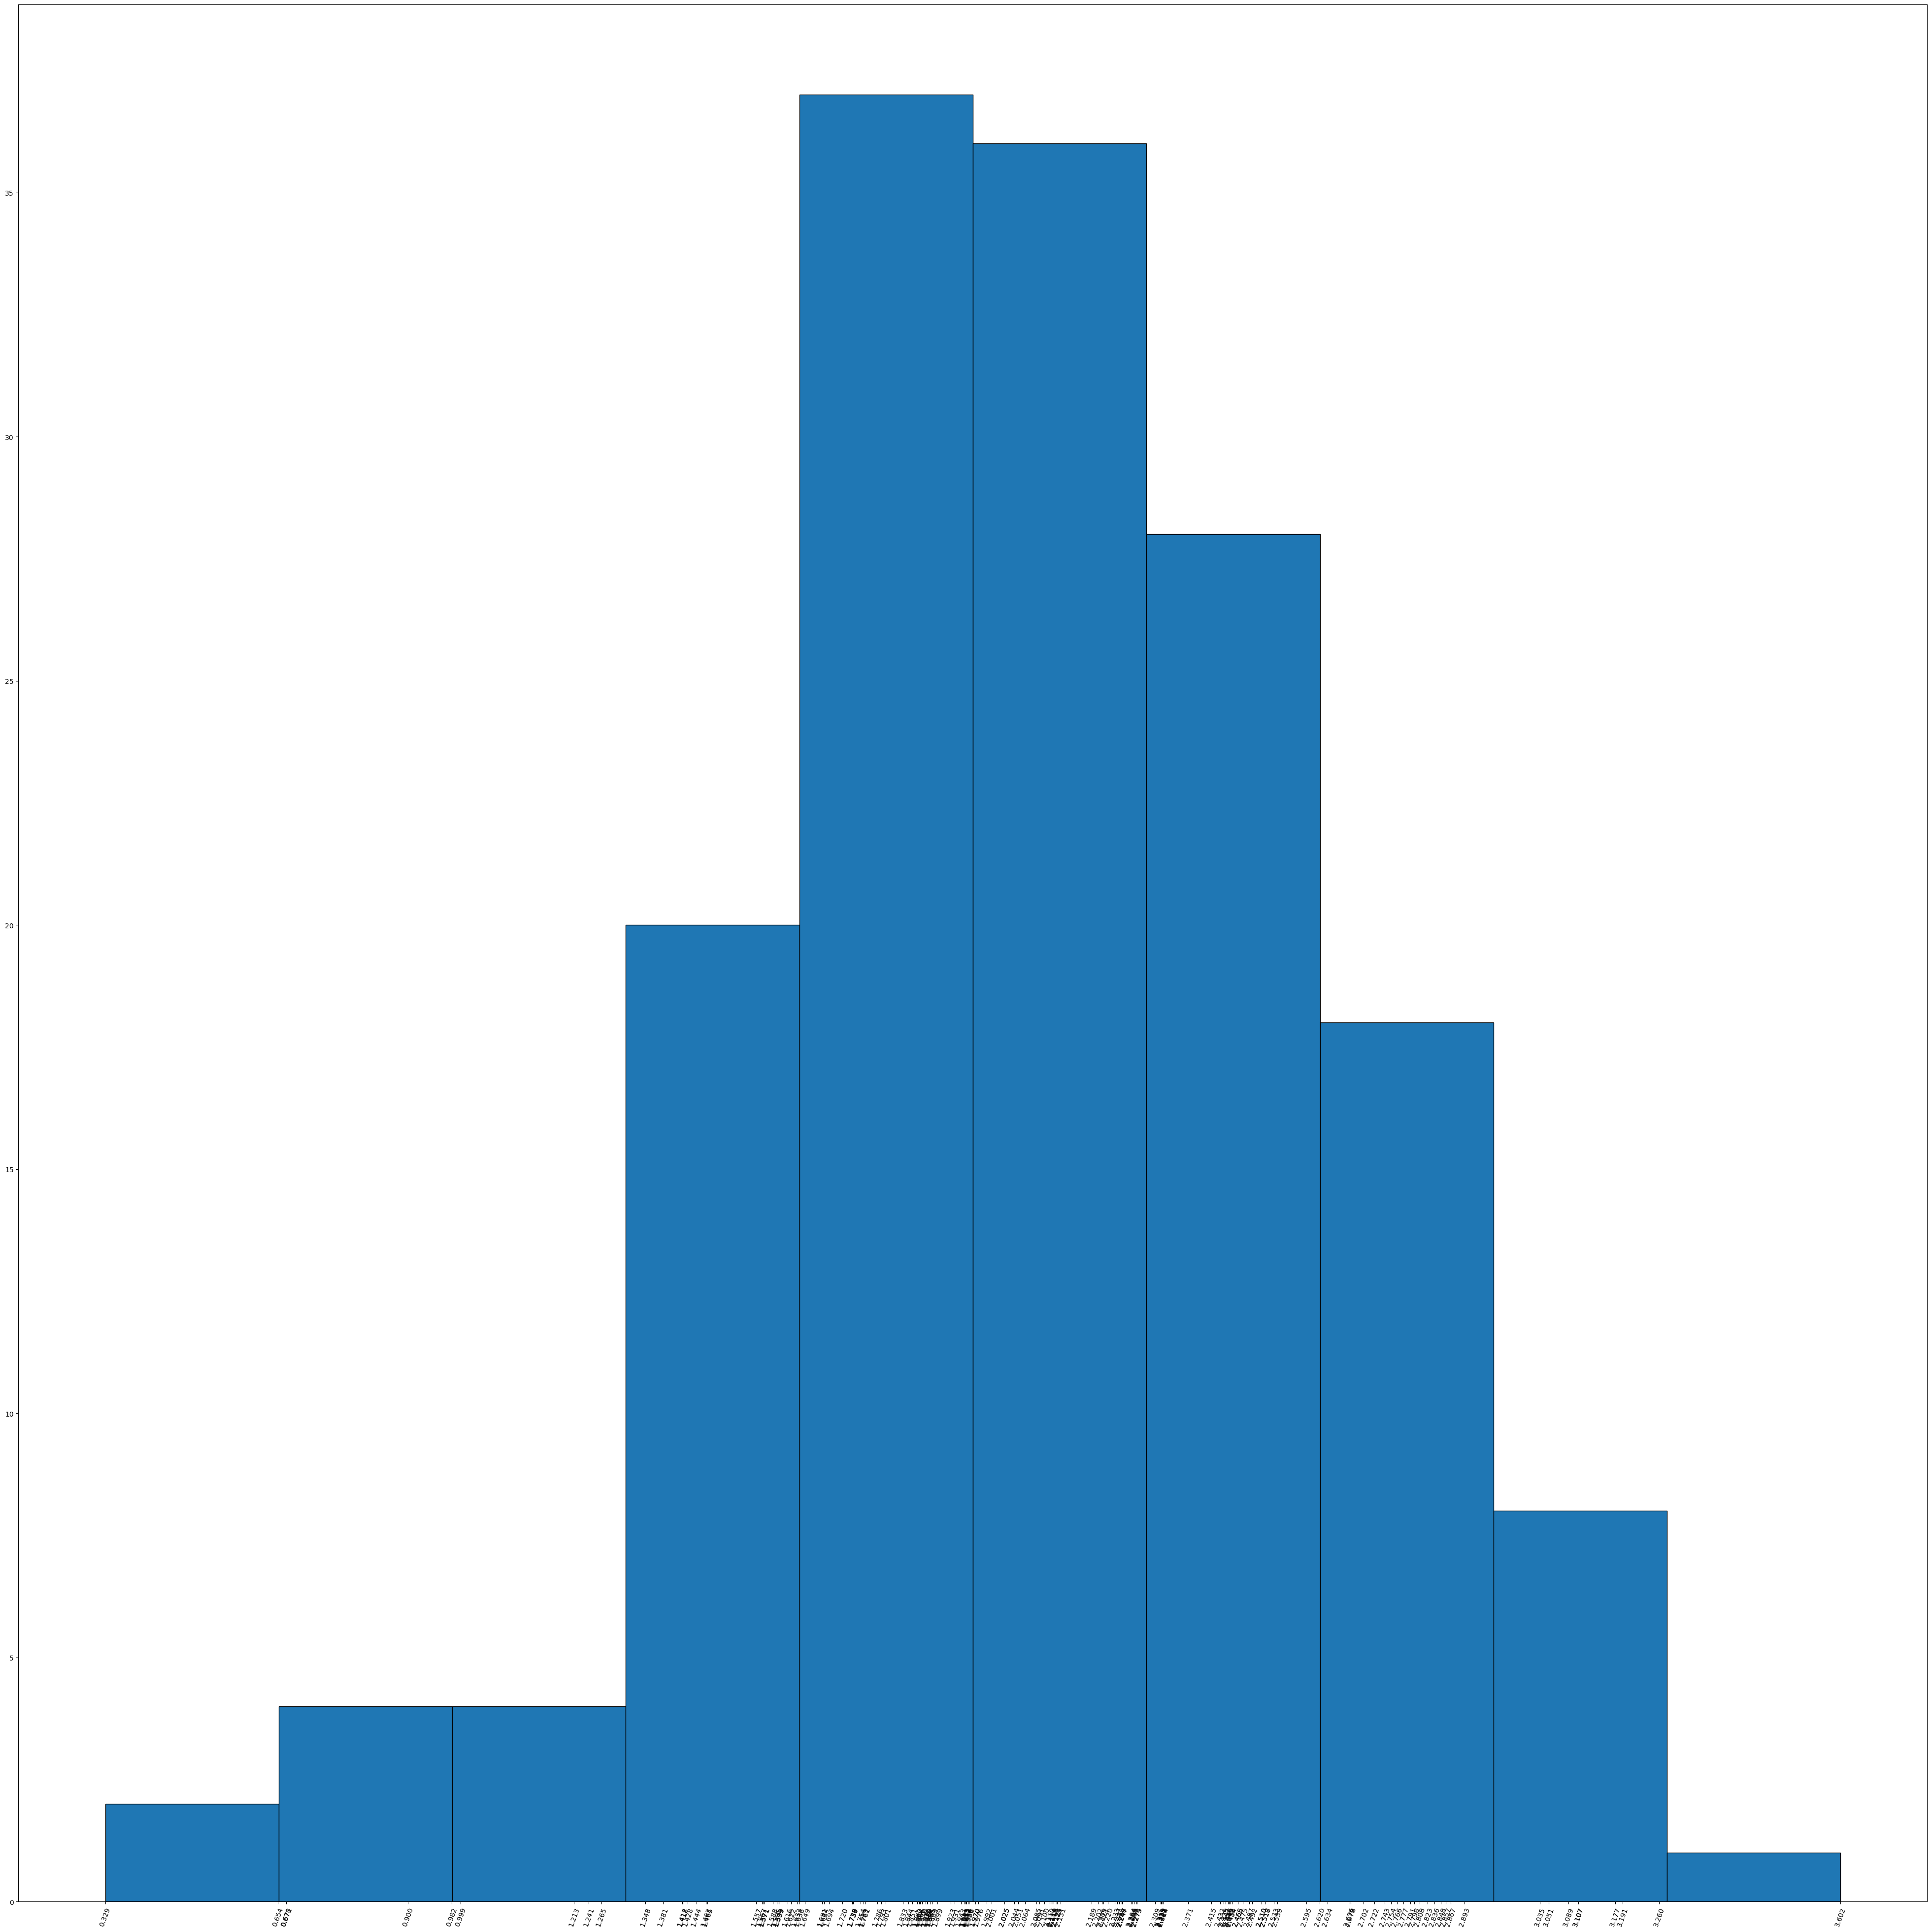

68.72821576763485 63.633204633204635
65.47302904564316 72.60810810810811
63.31120331950208 72.46718146718146


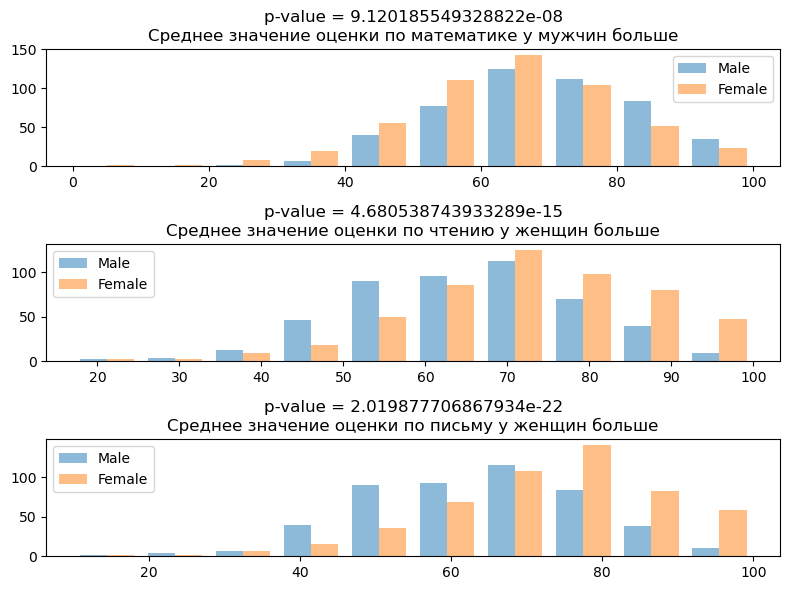

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
titanic_passengers = pd.read_csv("D:\IDA\lab_2_1_titanic\\train.csv")
titanic_passengers_info = pd.read_csv("D:\IDA\lab_2_1_titanic\\test.csv")
titanic_passengers_survived = pd.read_csv("D:\IDA\lab_2_1_titanic\\gender_submission.csv")
titanic_passengers = pd.DataFrame(titanic_passengers)
titanic_passengers_info = pd.DataFrame(titanic_passengers_info)
titanic_passengers_survived = pd.DataFrame(titanic_passengers_survived)

titanic_passengers_info = pd.merge(titanic_passengers_info, titanic_passengers_survived, on="PassengerId")
titanic_passengers_info.index = titanic_passengers_info["PassengerId"]
titanic_passengers_info = titanic_passengers_info.drop(["PassengerId"], axis = 1)

titanic_passengers.index = titanic_passengers["PassengerId"]
titanic_passengers = titanic_passengers.drop(["PassengerId"], axis = 1)
columns_order = ["Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]
titanic_passengers_info = titanic_passengers_info.reindex(columns = columns_order)
titanic_passengers = pd.concat([titanic_passengers, titanic_passengers_info], axis = 0)
# with pd.option_context('display.max_rows', None):
#       print(titanic_passengers["Name"].value_counts())
#titanic_passengers.loc[titanic_passengers["Name"] == "Connolly, Miss. Kate"]
#titanic_passengers.loc[titanic_passengers["Name"] == "Kelly, Mr. James"]
titanic_passengers.loc[titanic_passengers["Fare"] == 0]
def scale(df, column): 
    diff = pd.Series([0])
    scale_name = ""
    if (df[column].dtype == "int64") | (df[column].dtype == "float64"):            
        diff = pd.Series(df[column].unique())
        diff.sort_values(inplace = True)

        diff = diff.diff().dropna()
#         print(diff)
#         print(df[column])
    if (diff.iloc[0] == 1) & ((df[column]!=0).all()) & (diff.nunique() == 1):
        scale_name = "порядковая шкала"
        return scale_name
    
    
        #print(column, " ", scale_name)
       
    if (df[column].nunique() > 2) & (df[column].dtype != "object") & ((df[column]!=0).all()):
        scale_name = "интервальная шкала"
        #print(column, " ", scale_name)
        return scale_name
    if ((df[column]==0).any()) & (diff.nunique() != 1):
        scale_name = "относительная шкала"
        #print(column, " ", scale_name)
        return scale_name
    if (df[column].dtype == "object") | (scale_name != "порядковая шкала"):
        scale_name = "номинативная шкала"
        #print(column, " ", scale_name)
        return scale_name


#scale(titanic_passengers)

def conver_to_numinal_or_order_scale(df):
     for column in df.columns:
        scale_name = scale(df, column)
        if scale_name == "интервальная шкала":
            codes, uniques = pd.factorize(df[column])
            df[column] = codes
            scale_name = scale(df, column)
            print(column, scale_name)
        elif scale_name == "относительная шкала" :
            codes, uniques = pd.factorize(df[column])
            df[column] = codes
            if df[column].nunique() < 10:
                df[column] = df[column].replace([0,1,2], 0)
                df[column] = df[column].replace([3,4,5,6,7,8,9], 1)
            
            scale_name = scale(df, column)
            print(column, scale_name)
        else:
            print(column, scale_name)
        
            
def print_scale(df):
    for column in df.columns:
        scale_name = scale(df, column)
        print(column, scale_name)
    print("\n")
    
def analysis(df):
    for column in df.columns:
        scale_name = scale(df, column)
        if scale_name == "номинативная шкала":
            print(f"Мода {df[column].mode()}")
        if scale_name == "порядковая шкала":
            print(f"Медиана {df[column].median()}")
        if (scale_name == "интервальная шкала") | (scale_name == "относительная шкала"):
            print(f"Среднее значение {df[column].mean()}")
print_scale(titanic_passengers)
titanic_passengers
analysis(titanic_passengers)
titanic_passengers.describe()
conver_to_numinal_or_order_scale(titanic_passengers)
happiness_df = pd.read_csv("D:/IDA/2015.csv")
happiness_df.loc[82, ["Happiness Rank"]] = 83
happiness_df.index = happiness_df["Country"]
happiness_df = happiness_df.drop("Country", axis=1)

for column in happiness_df.columns:
    print(column, scale(happiness_df, column))
pd.Series(happiness_df["Happiness Rank"].unique()).sort_values()
happiness_df["Happiness Rank"].duplicated()

# happiness_df["Montenegro"] = happiness_df["Happiness Rank"]

duplicates = happiness_df[happiness_df["Happiness Rank"].duplicated()]
duplicates
happiness_df
def graphics(df):
    for column in df.columns:
        
        scale_name = scale(df, column)
        if scale_name ==  "номинативная шкала":
            plt.figure(figsize=(30,30))
            plt.bar(df[column], df.index)
            plt.xticks(rotation=90)
        else:
            plt.figure(figsize=(50,50))
            plt.hist(df[column], bins=10, edgecolor="black")
            plt.xticks(df[column])
            plt.xticks(rotation=70)
            plt.show()
graphics(happiness_df)
df=happiness_df.loc[happiness_df["Region"]=="North America", "Happiness Rank"]
#happiness_df["Region"].value_counts()
education_df=pd.read_csv("D:/IDA/StudentsPerformance.csv")

male_math_marks = education_df.loc[education_df["gender"] == "male"]["math score"]
female_math_marks = education_df.loc[education_df["gender"] == "female"]["math score"]

male_reading_marks = education_df.loc[education_df["gender"] == "male"]["reading score"]
female_reading_marks = education_df.loc[education_df["gender"] == "female"]["reading score"]

male_writing_marks = education_df.loc[education_df["gender"] == "male"]["writing score"]
female_writing_marks = education_df.loc[education_df["gender"] == "female"]["writing score"]

math_t_statistic, math_p_value = stats.ttest_ind(male_math_marks, female_math_marks)
reading_t_statistic, reading_p_value = stats.ttest_ind(male_reading_marks, female_reading_marks)
writing_t_statistic, writing_p_value = stats.ttest_ind(male_writing_marks, female_writing_marks)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6))
ax1.hist([male_math_marks, female_math_marks], alpha = 0.5, label=["Male", "Female"])
ax2.hist([male_reading_marks, female_reading_marks], alpha = 0.5, label=["Male", "Female"])
ax3.hist([male_writing_marks, female_writing_marks], alpha = 0.5, label=["Male", "Female"])

ax1.legend()
ax2.legend()
ax3.legend()
i=0
for ax in [ax1, ax2,ax3]:
    p_value = [math_p_value,reading_p_value,writing_p_value]
    male_marks=[male_math_marks, male_reading_marks, male_writing_marks]
    female_marks=[female_math_marks, female_reading_marks, female_writing_marks]
    subjects=["математике", "чтению", "письму"]
    if p_value[i] < 0.05:
        print(male_marks[i].mean(), female_marks[i].mean())        
        if male_marks[i].mean() > female_marks[i].mean():
            ax.set_title(f'p-value = {p_value[i]}\nСреднее значение оценки по {subjects[i]} у мужчин больше')
        else:
            ax.set_title(f'p-value = {p_value[i]}\nСреднее значение оценки по {subjects[i]} у женщин больше')
    else:
        ax.set_title(f'p-value = {p_value[i]}\nСредние значения оценок по {subjects[i]} не различаются')
    i+=1
plt.tight_layout()
plt.show()
education_df
# t_statistic
# p_value
# print(np.var(male_marks), np.var(female_marks))
# np.var(female_marks) / np.var(male_marks)
# print(male_marks.mean(), female_marks.mean())
# education_df